In [1]:
import numpy as np
import scipy.misc
import cv2

import glob

import matplotlib.pyplot as plt
import thinning as th
%matplotlib inline

In [2]:
scale = 1./16. #0.125
conversion = 0.345

In [3]:
masks = glob.glob('./masks/*.tif')

In [4]:
results = {}

In [5]:
for filename in masks:
    mask_name = str.split(str.split(filename,'/')[-1],'.')[0]
    #read
    mask = cv2.imread(filename)
    #rescale
    mask1 = scipy.misc.imresize(mask, scale) 
    #grayscale
    mask_g = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    #threshold
    ret, mask_bw = cv2.threshold(mask_g, 127, 255, cv2.THRESH_BINARY)
    #invert, not necessary
    # mask_bw = 255 - mask_bw
    # write mask to file
    cv2.imwrite('./results/'+mask_name+'_msk.jpg',mask_bw)
    # thinning algo
    bw2 = th.thinning(mask_bw)
    # save thinned image
    cv2.imwrite('./results/'+mask_name+'_thin.jpg',bw2)
    # distance transform
    dist = cv2.distanceTransform(mask_bw, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
    # save dist transf image
    cv2.imwrite('./results/'+mask_name+'_dt.jpg',dist)
    # compute thickness
    th_values = 2*dist[np.where(bw2>0.0)] / scale * conversion
    results[mask_name] = (np.mean(th_values), np.std(th_values), len(th_values))

In [6]:
print results

{'GL box7-3E01mask': (94.593613, 39.529205, 2519), 'GL box7-3Amask': (93.986031, 40.278458, 2420), 'GL box7-3AE01mask': (92.92643, 38.290737, 2459), 'GL box2-4E01mask': (95.158218, 43.225098, 2560), 'GL box6-2AE01mask': (100.7189, 41.112309, 2498), 'GL box7-3mask': (87.449249, 36.805546, 2442), 'GL box3-4E01mask': (100.98382, 40.537609, 2765), 'GL box10-6mask': (97.726768, 37.819981, 2717), 'GL box2-4mask': (94.727844, 43.920868, 3272), 'GL box10-6AE01mask': (94.916832, 42.753998, 2802), 'GL box1-1mask': (113.61739, 43.136295, 2529), 'GL box2-4aE01mask': (93.860176, 41.916672, 3212), 'GL box3-4AE01mask': (102.1028, 40.983749, 2738), 'GL box3-4amask': (102.59921, 42.461452, 2721), 'GL box4-2amask': (106.31518, 51.163719, 3399), 'GL box4-2E01mask': (109.34583, 50.195553, 3730), 'GL box10-6Amask': (98.786934, 40.406109, 2855), 'GL box6-2Amask': (97.937653, 40.743851, 2517), 'GL box2-4amask': (99.542595, 43.659248, 3168), 'GL box10-6E01mask': (97.05291, 42.260952, 2747), 'GL box3-4mask': (

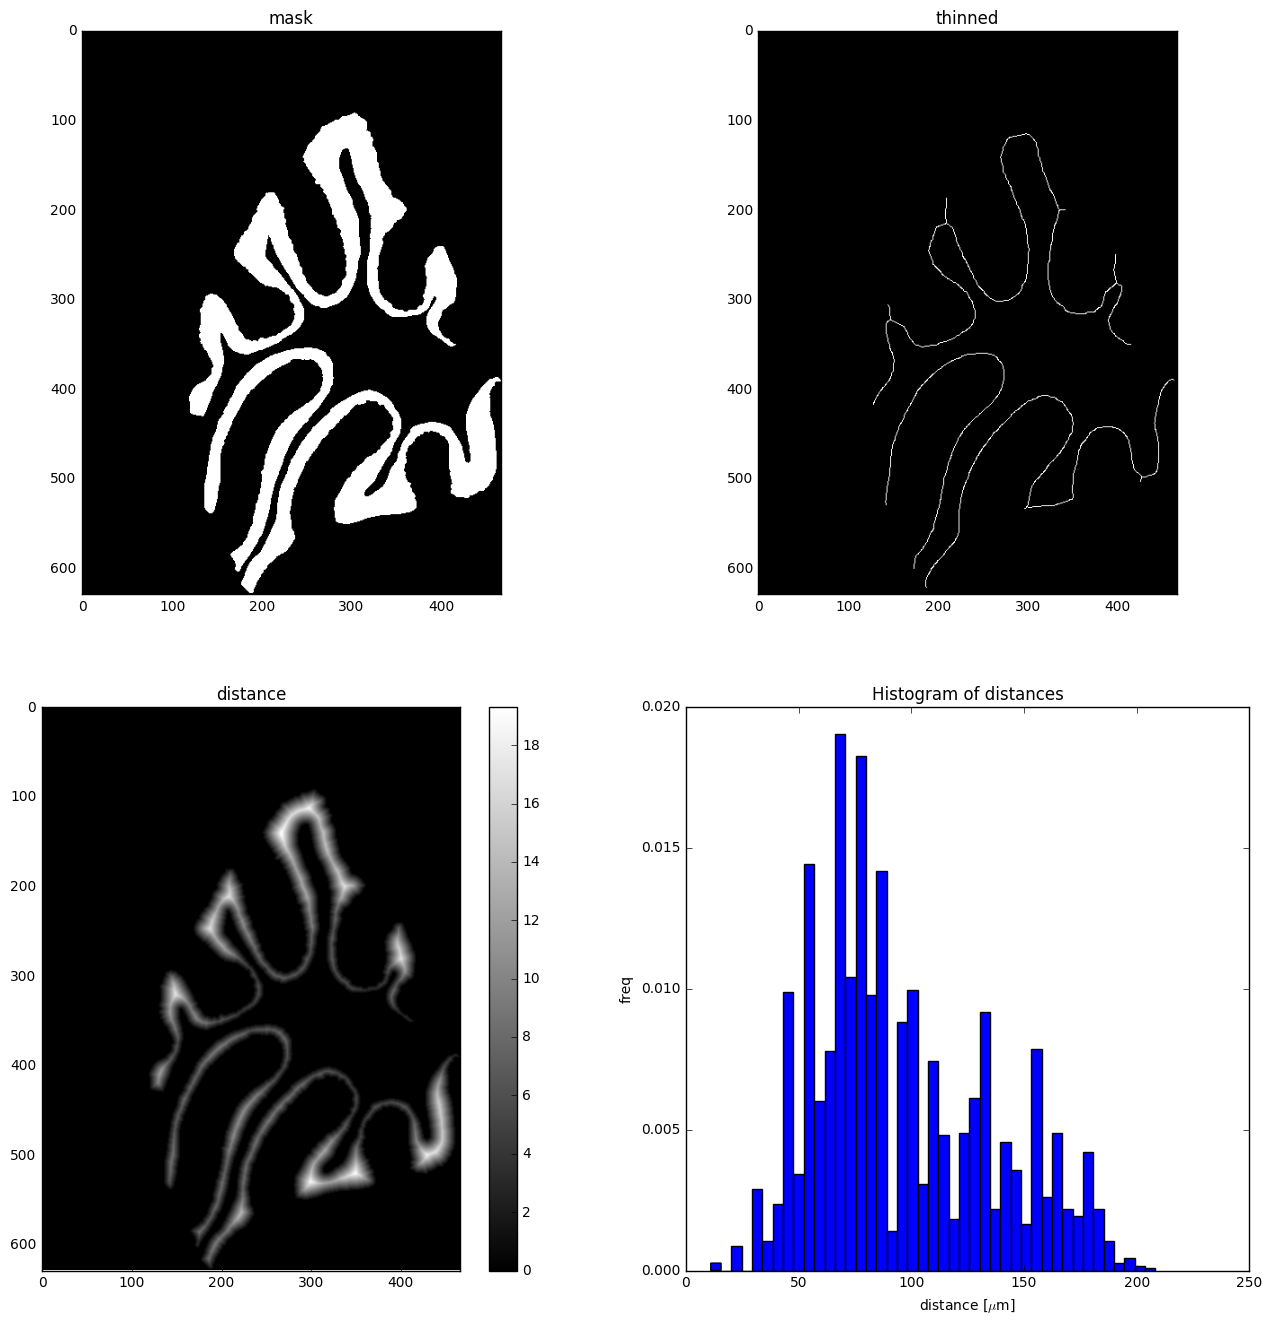

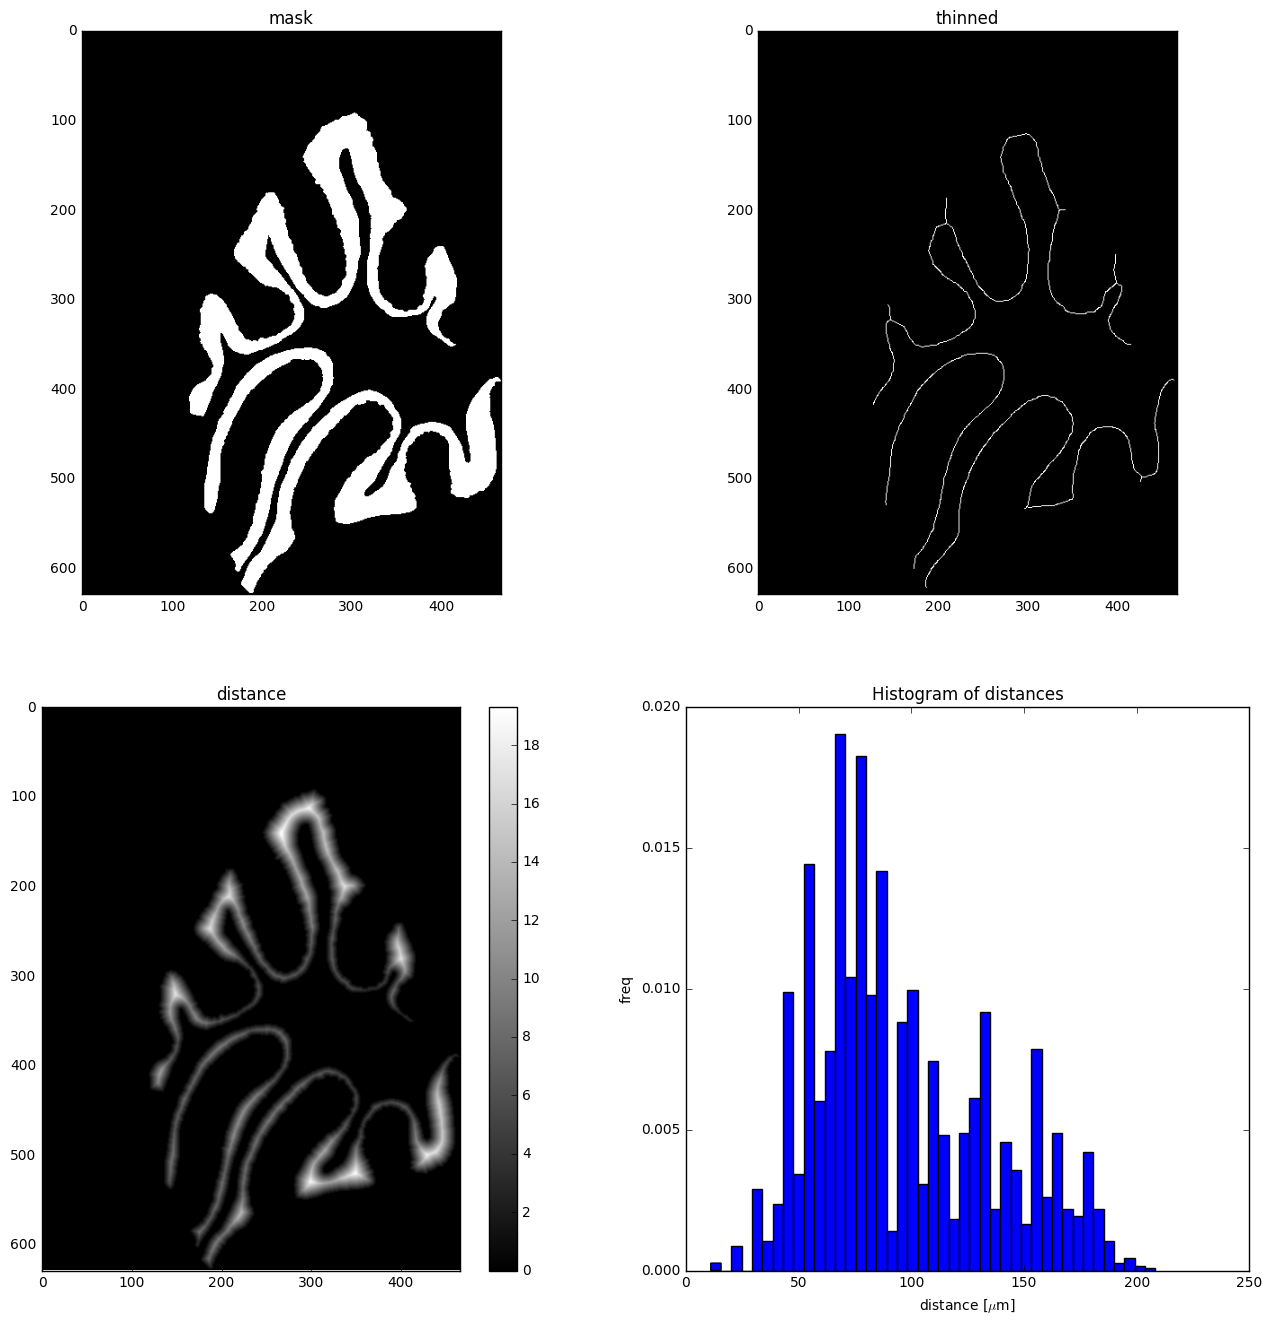

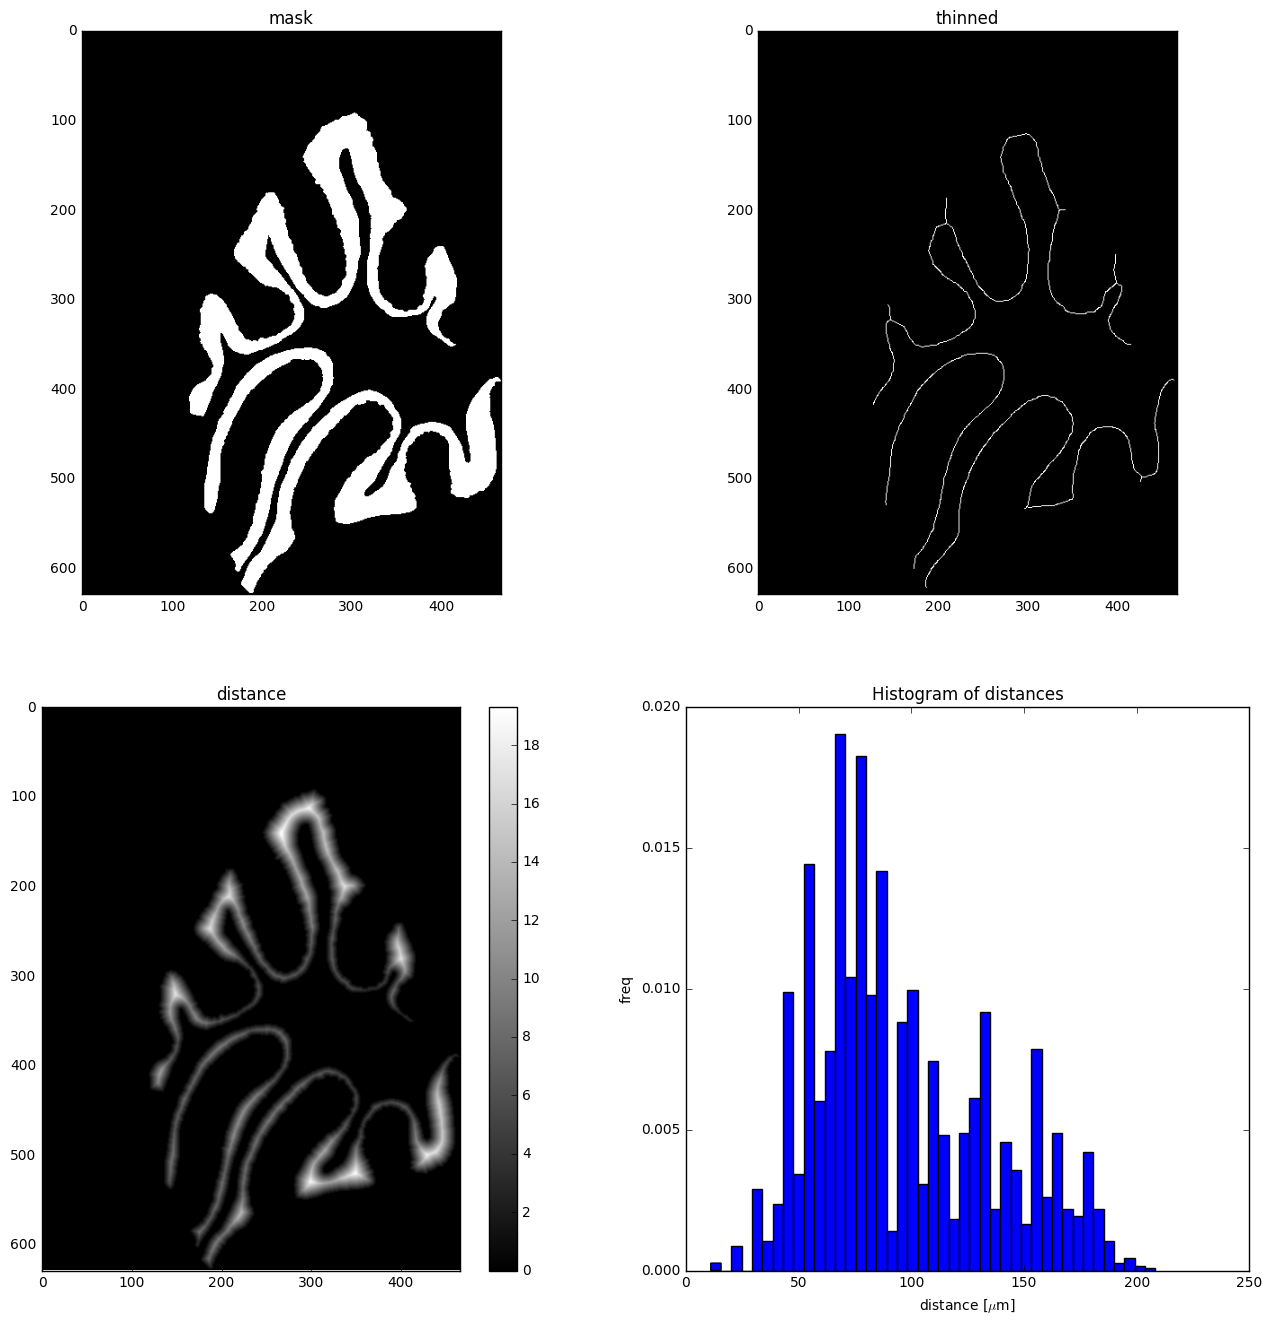

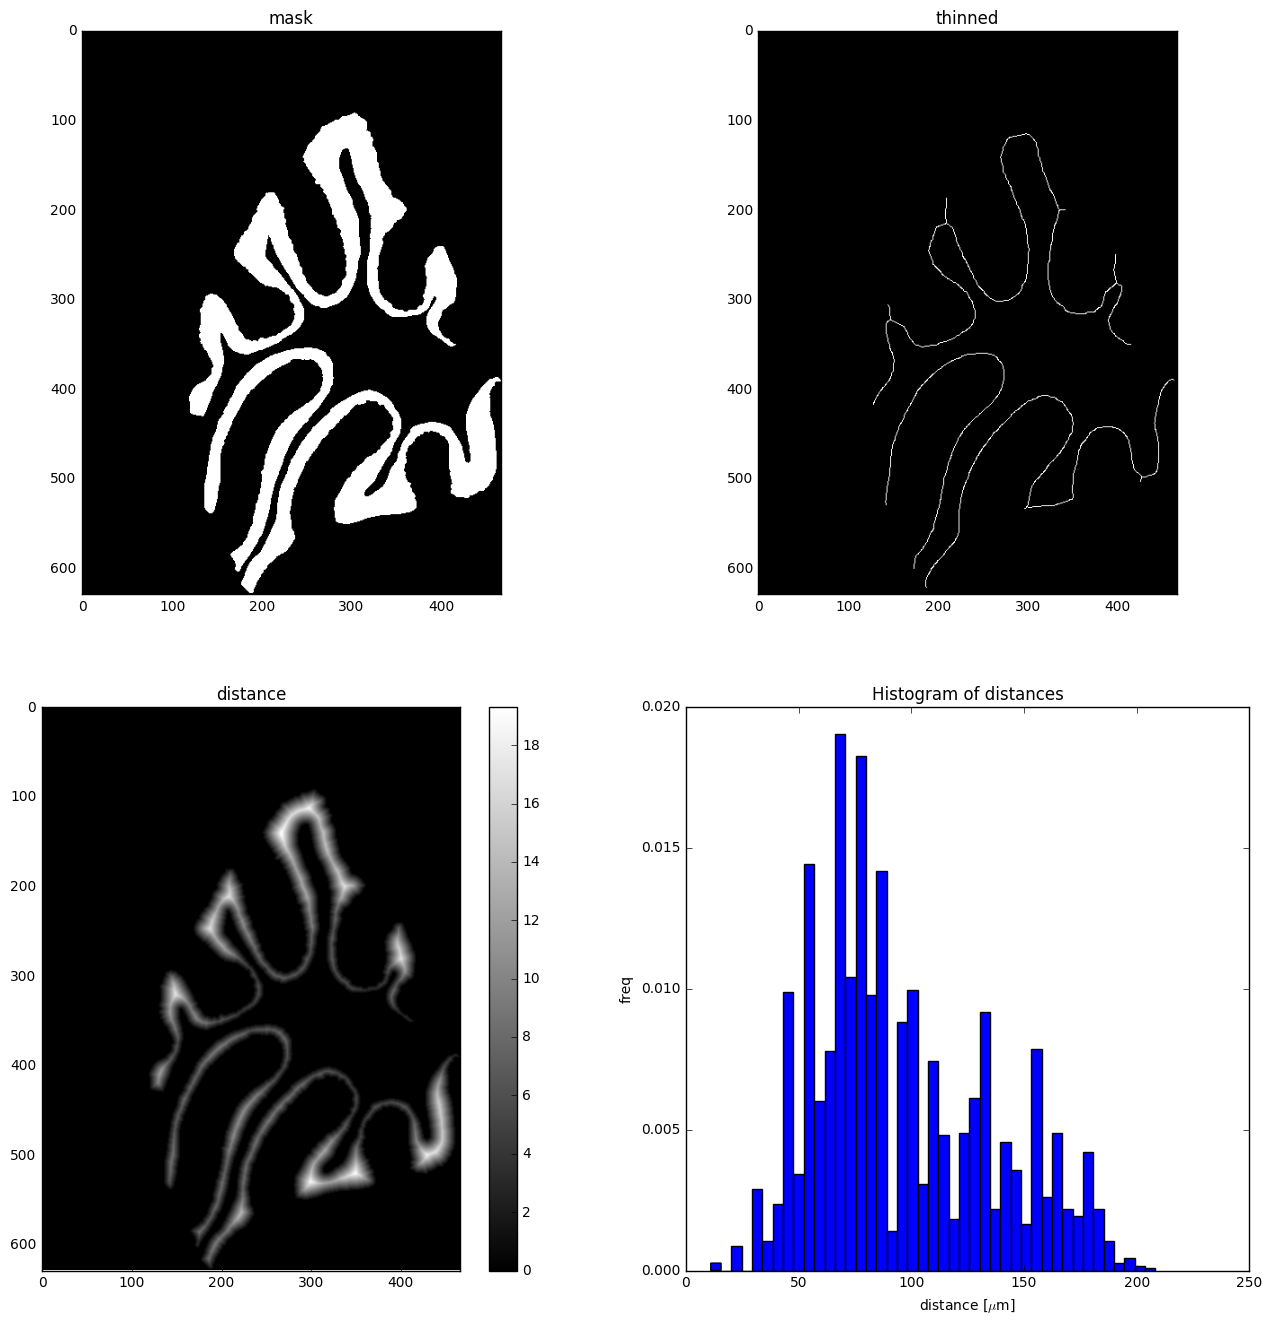

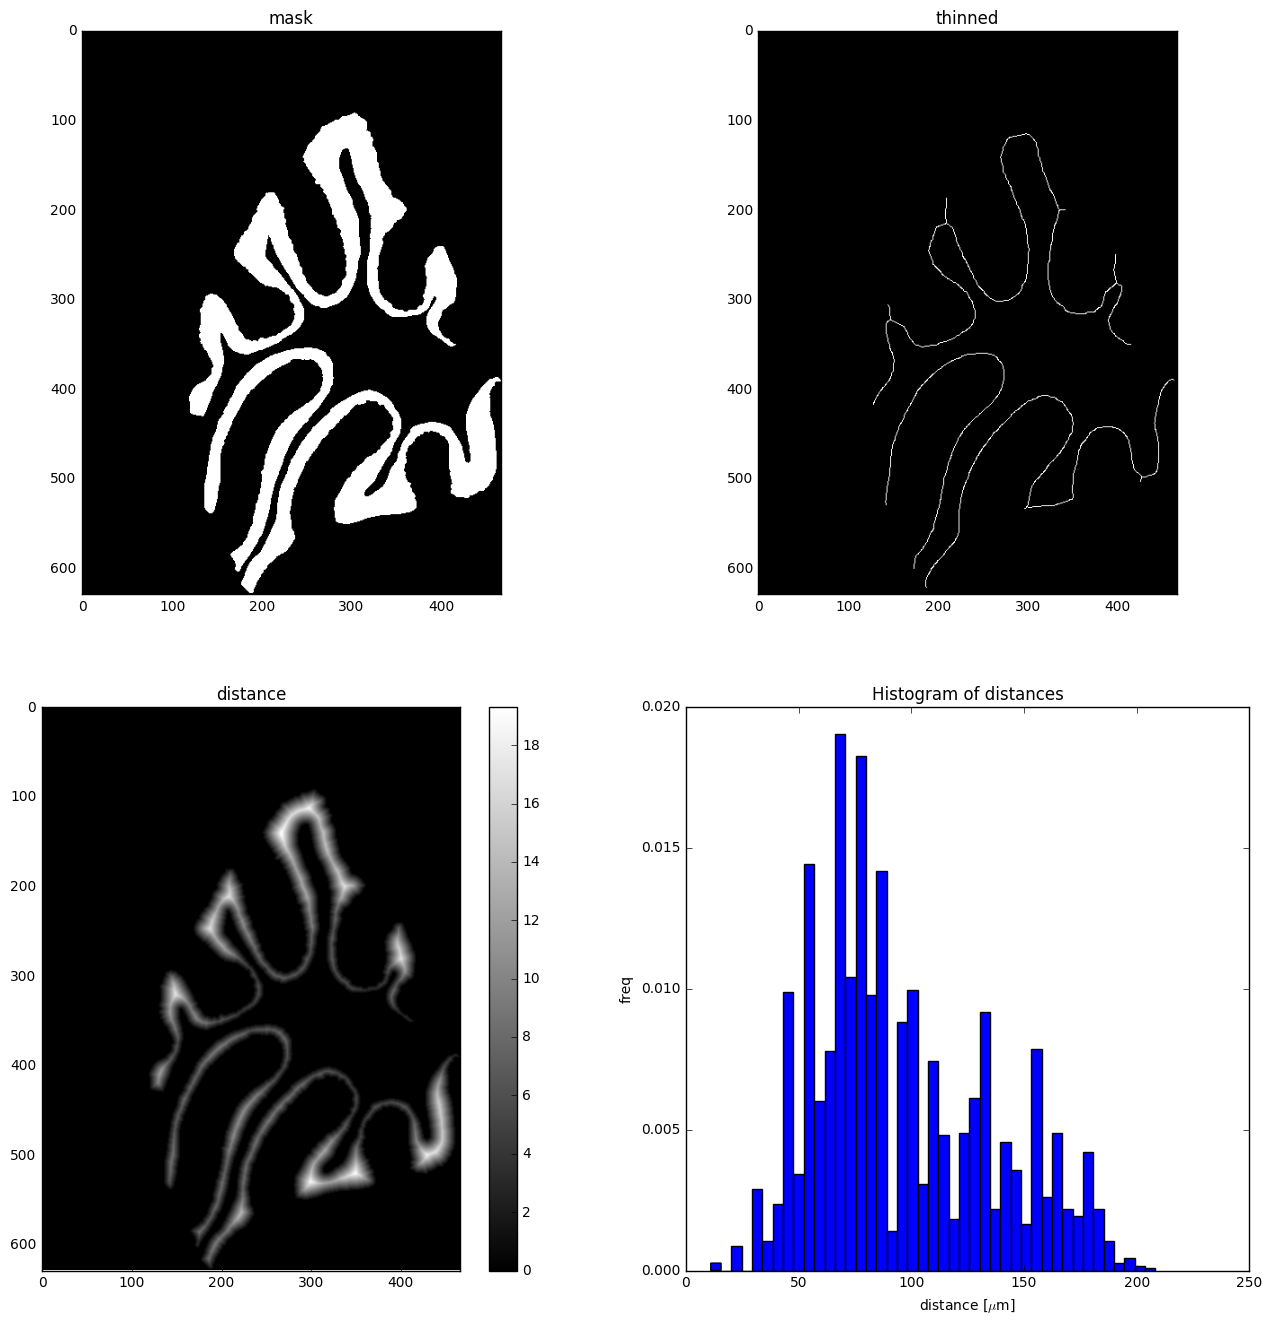

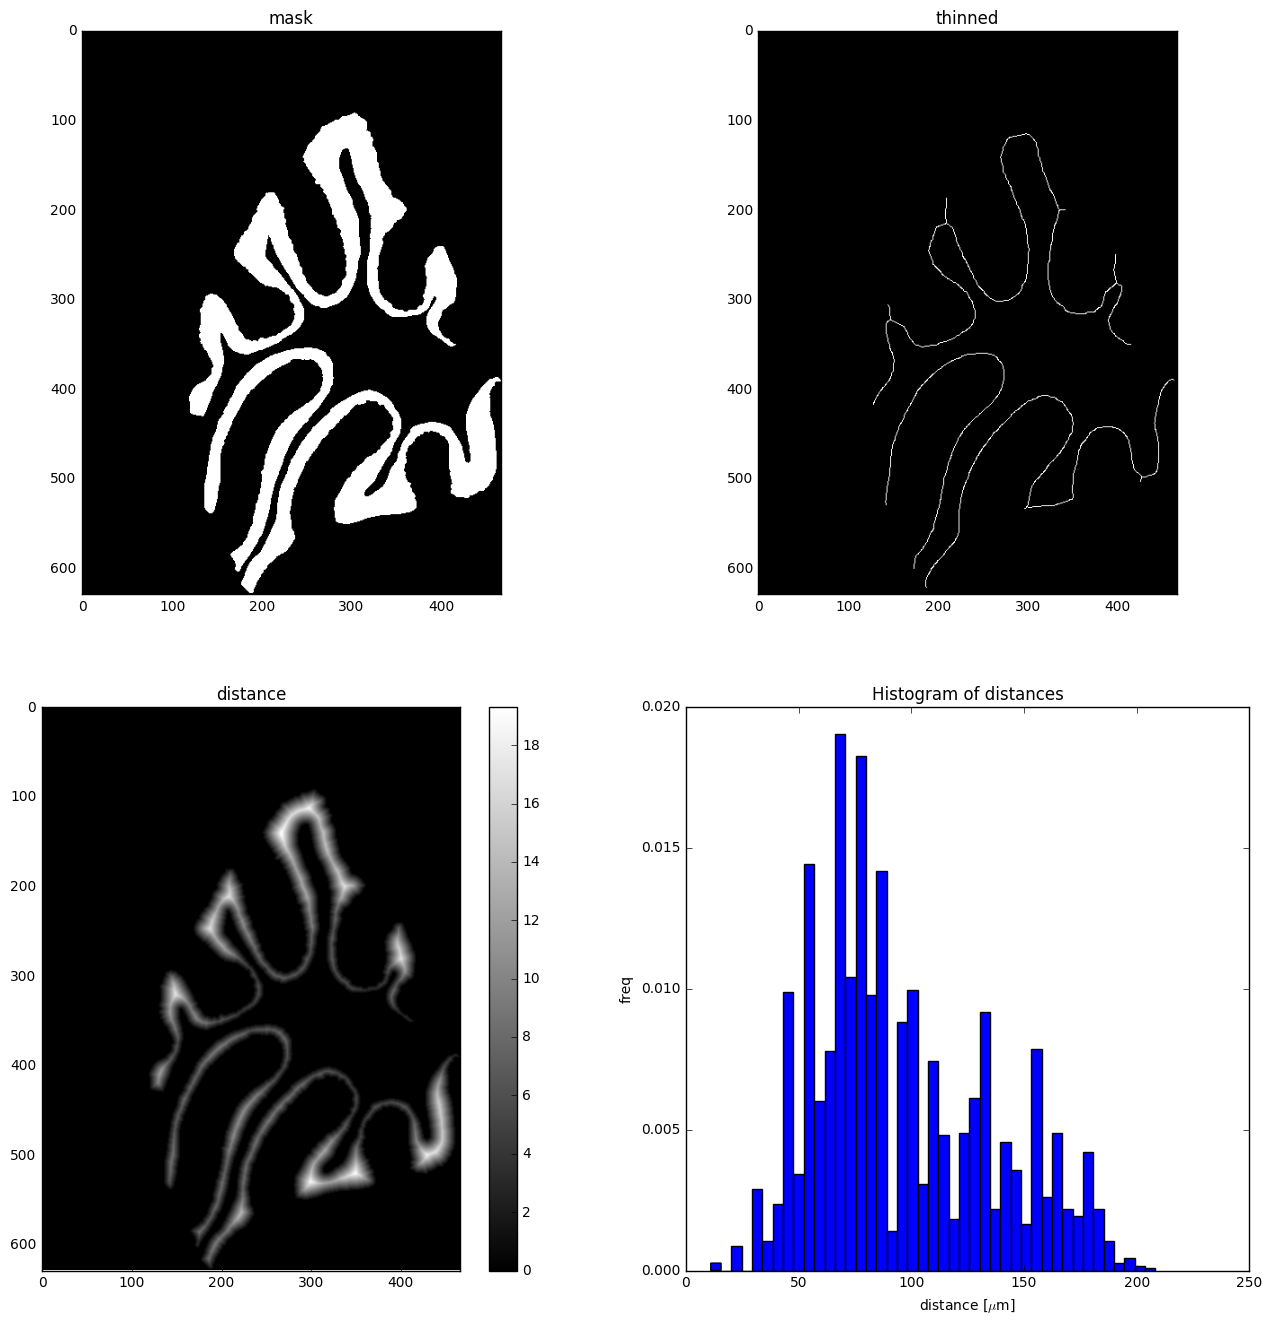

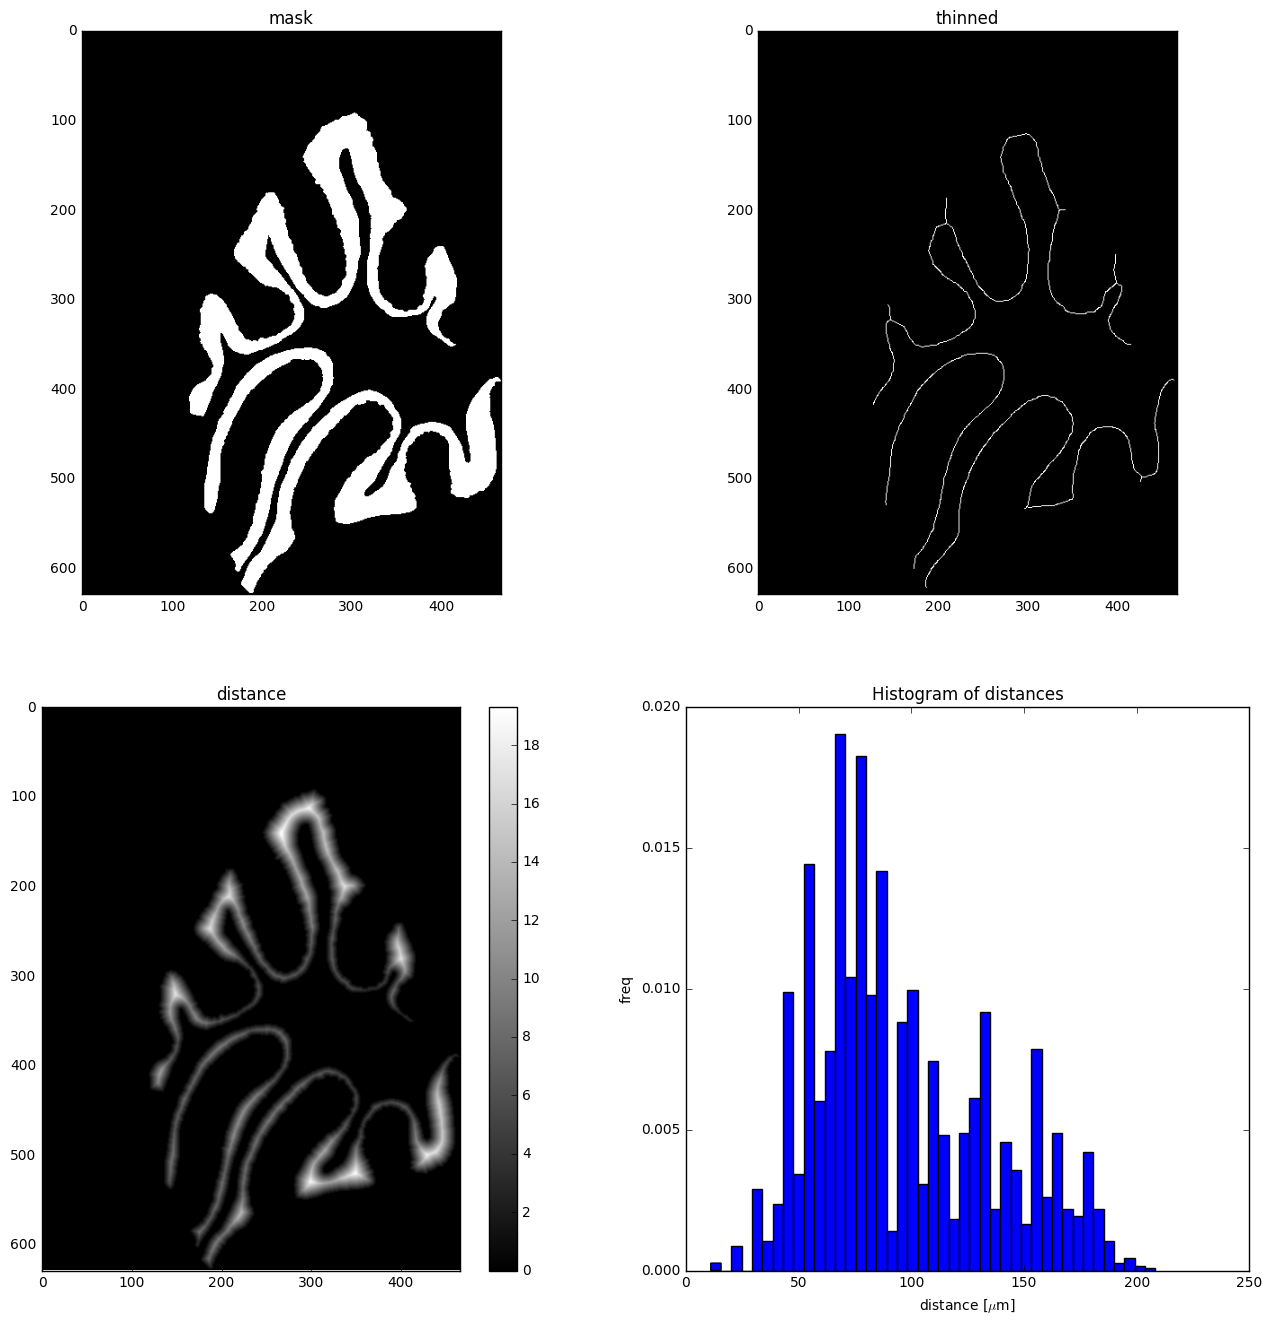

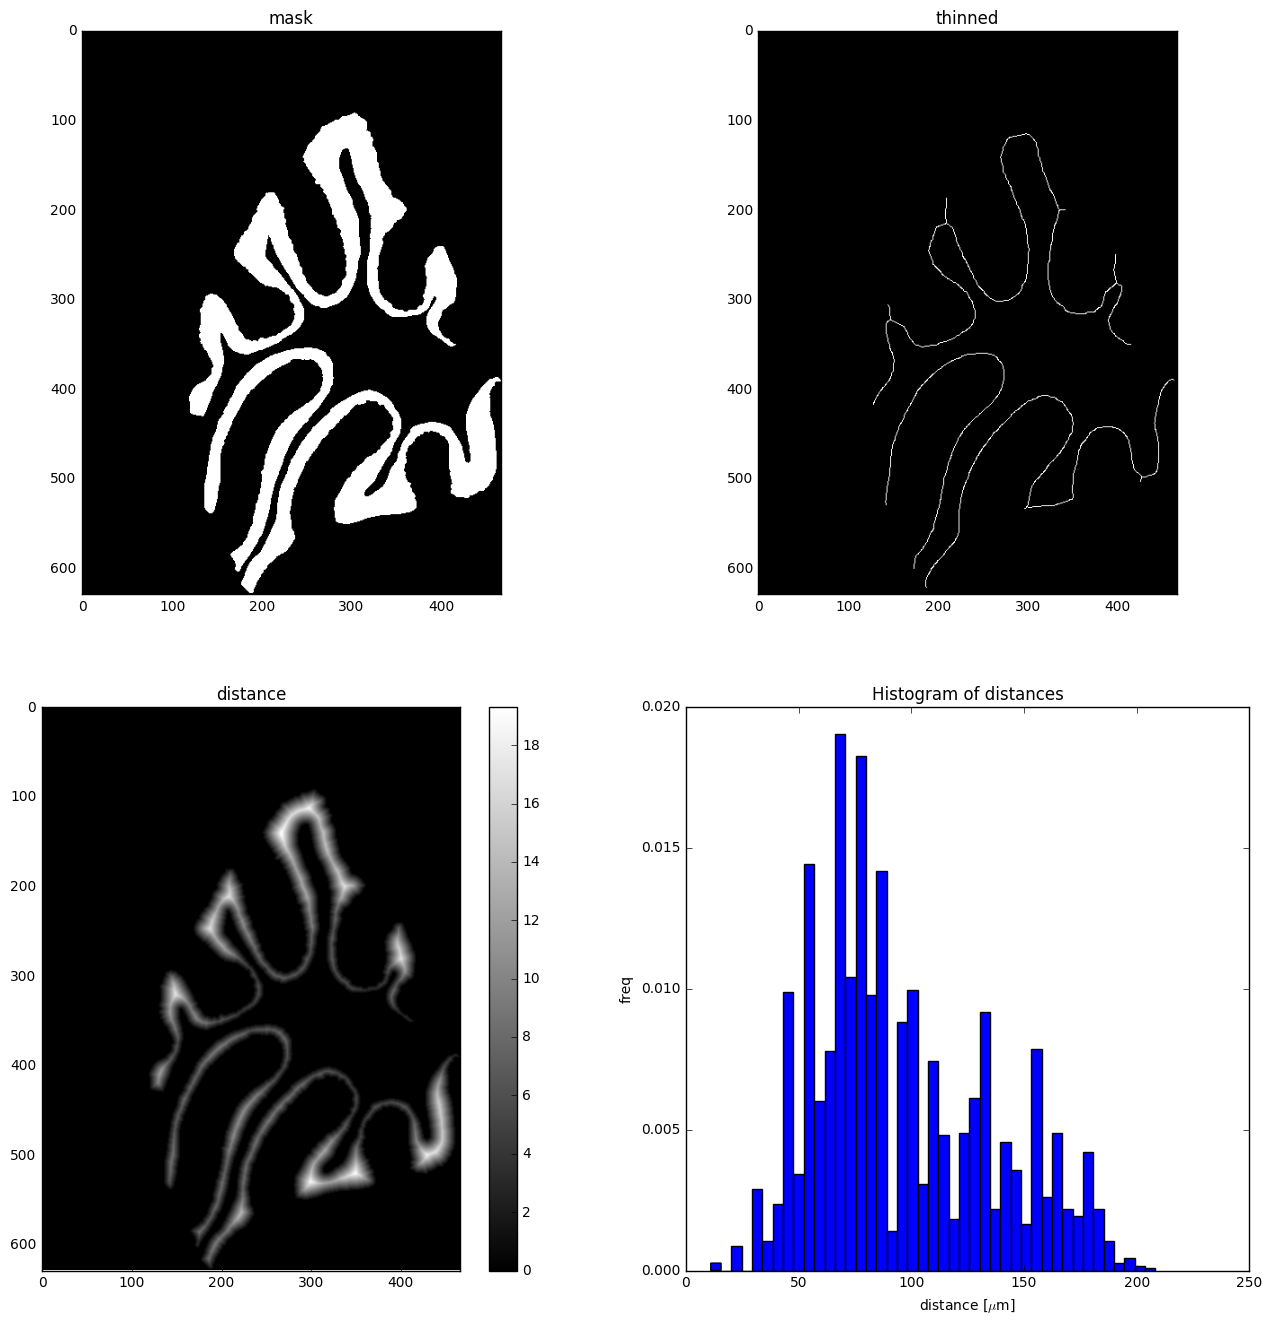

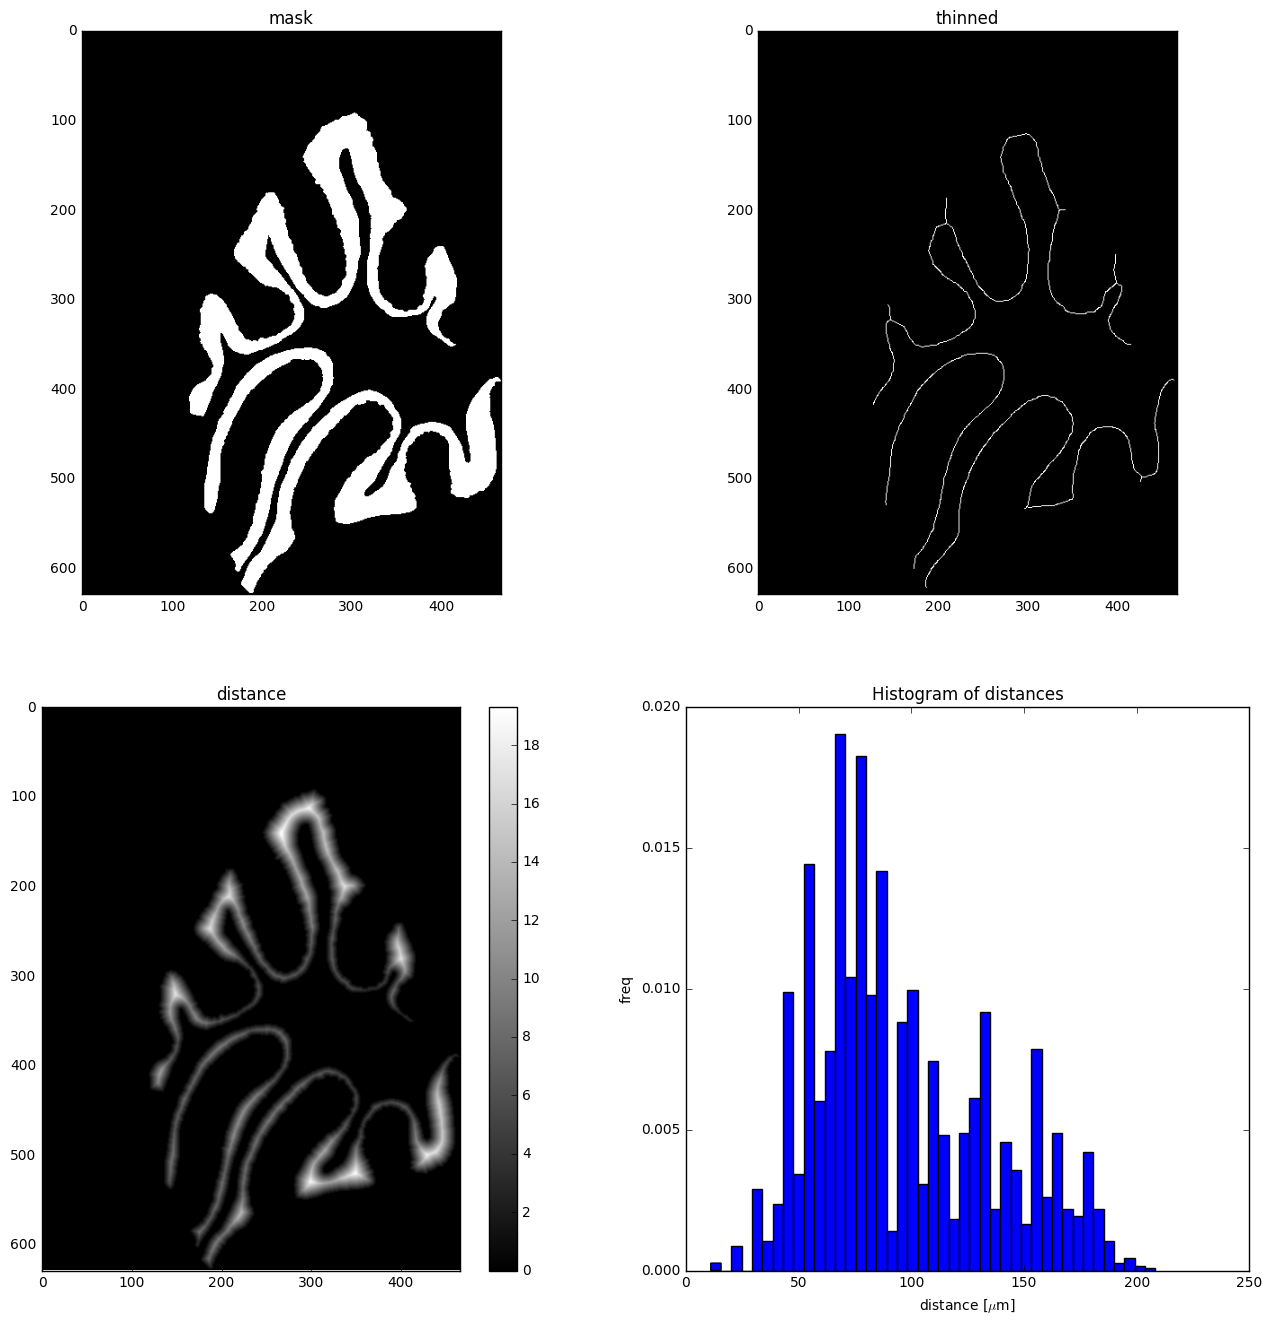

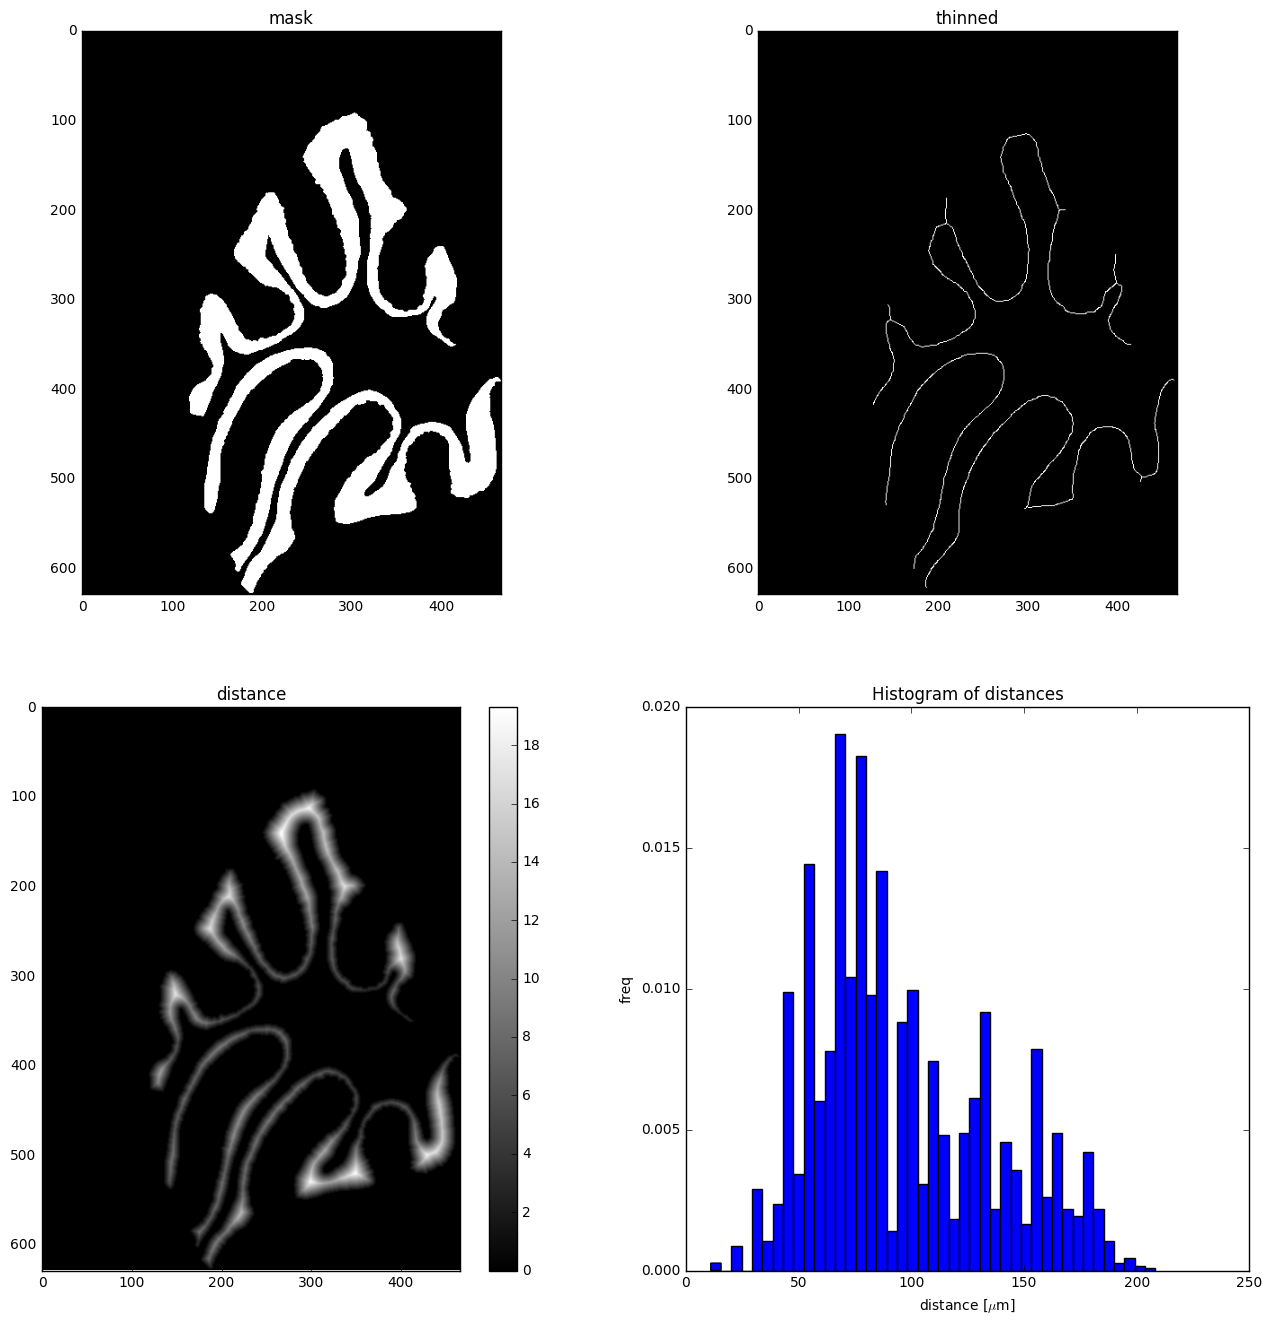

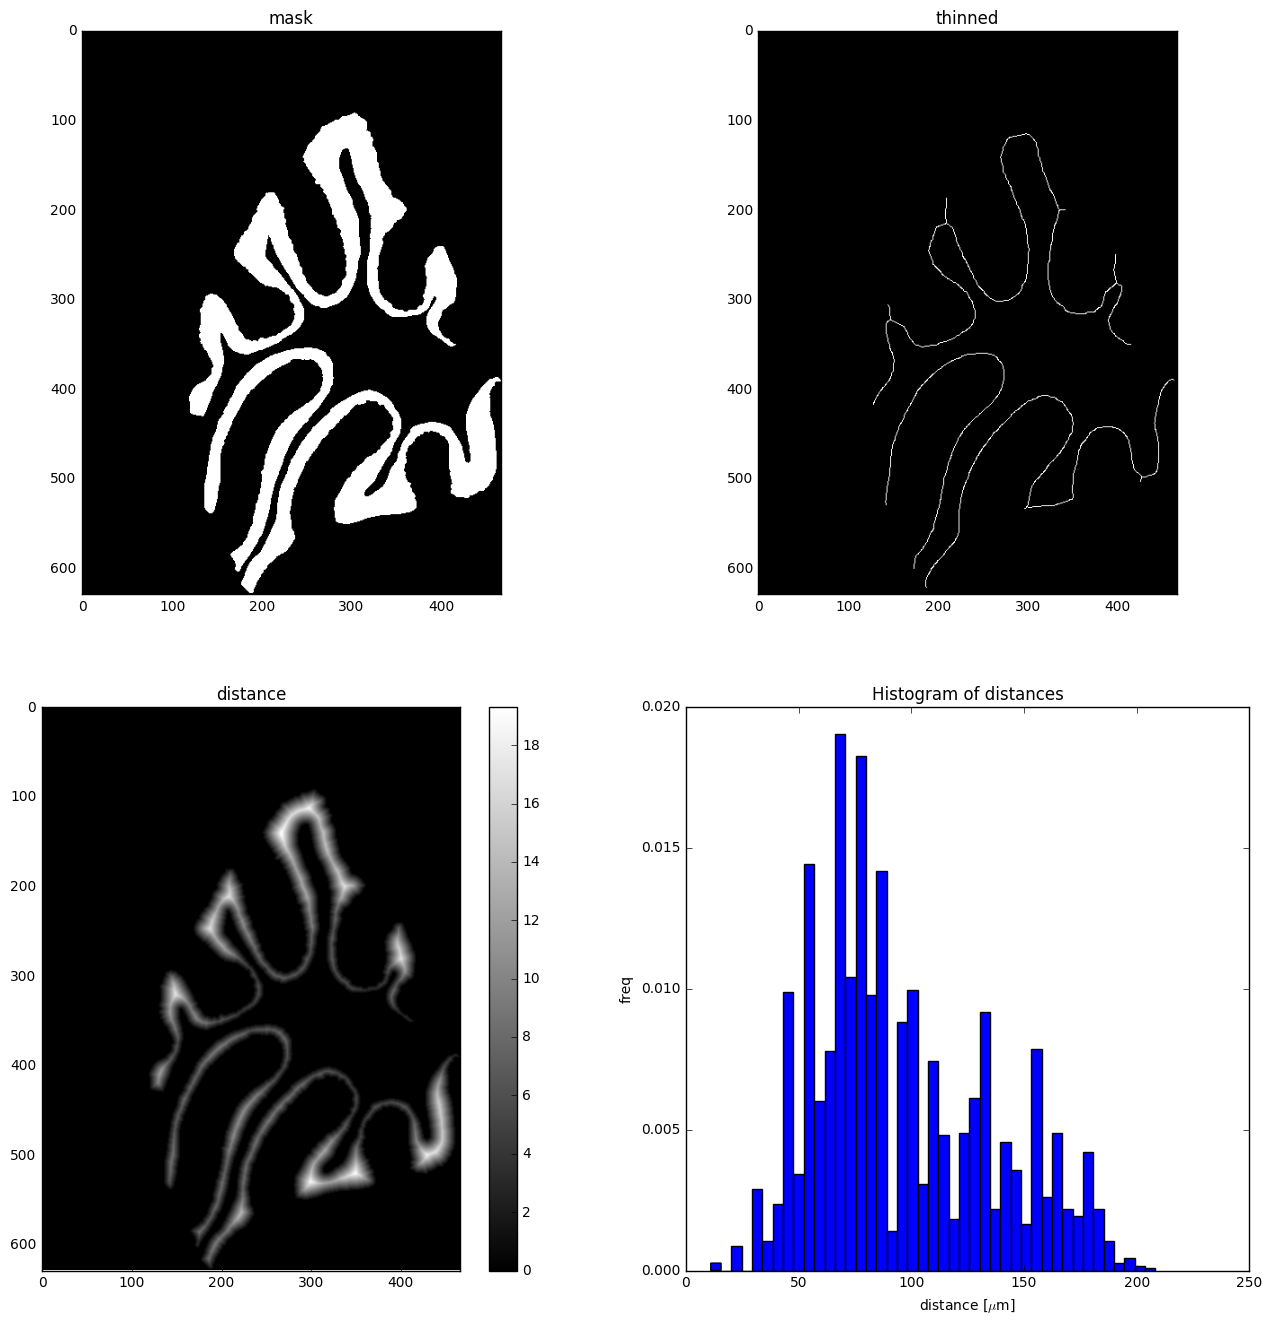

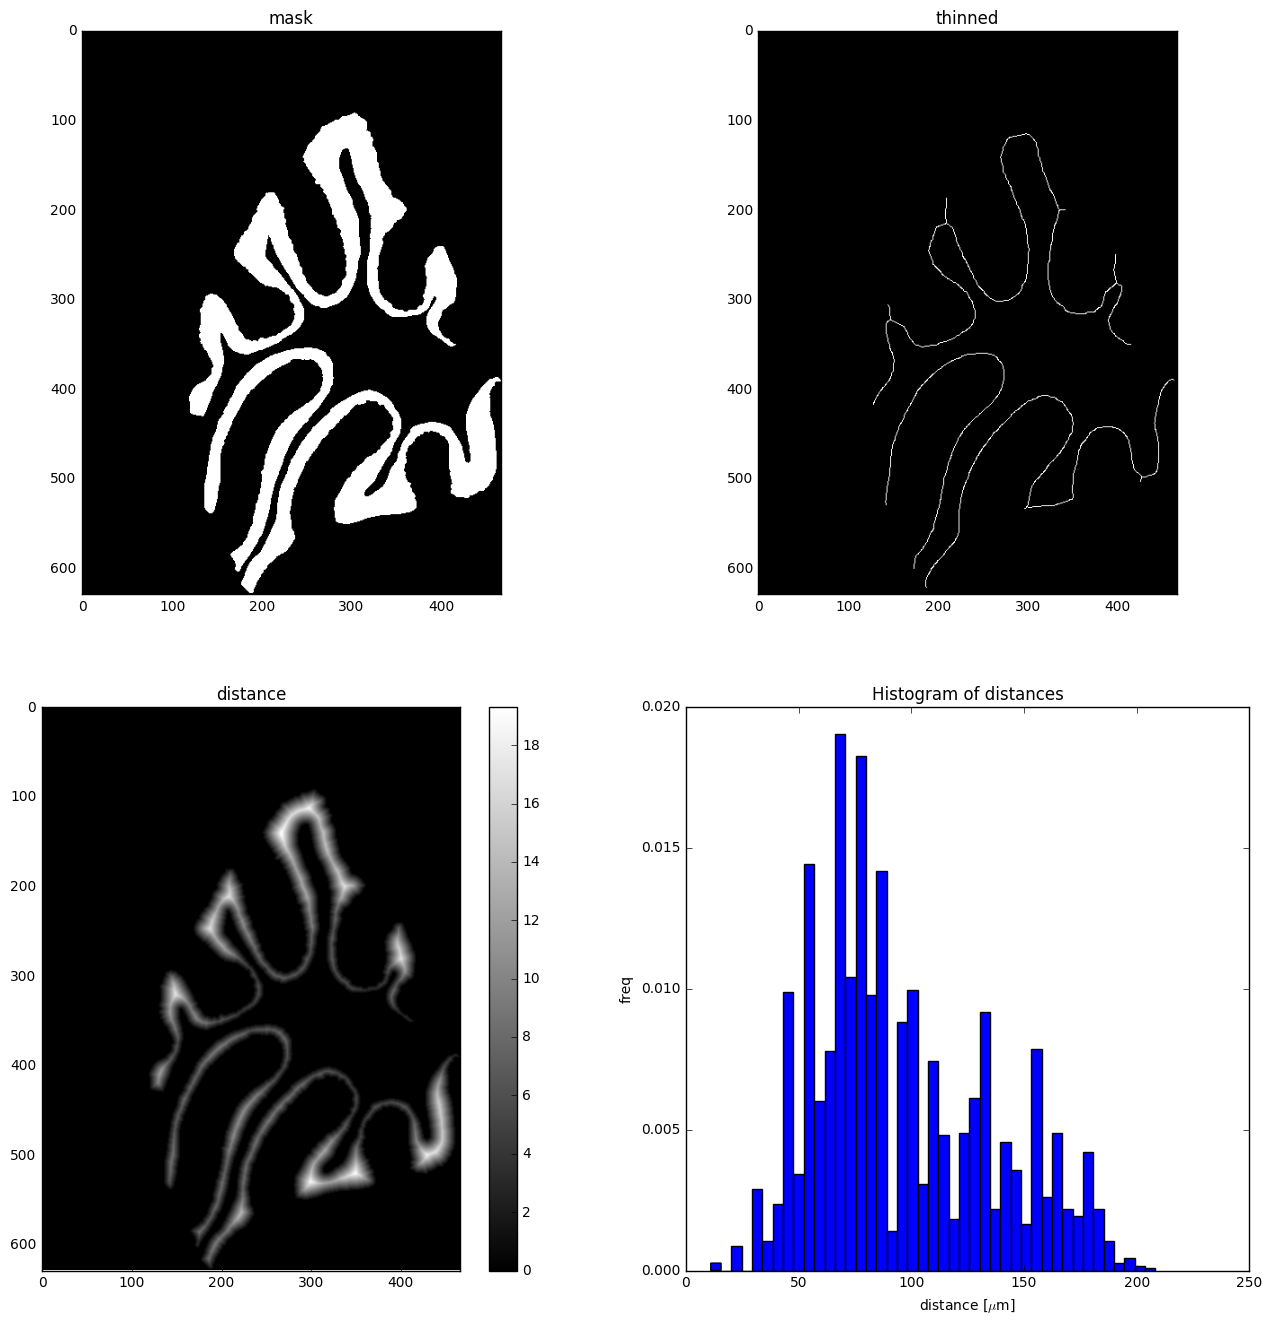

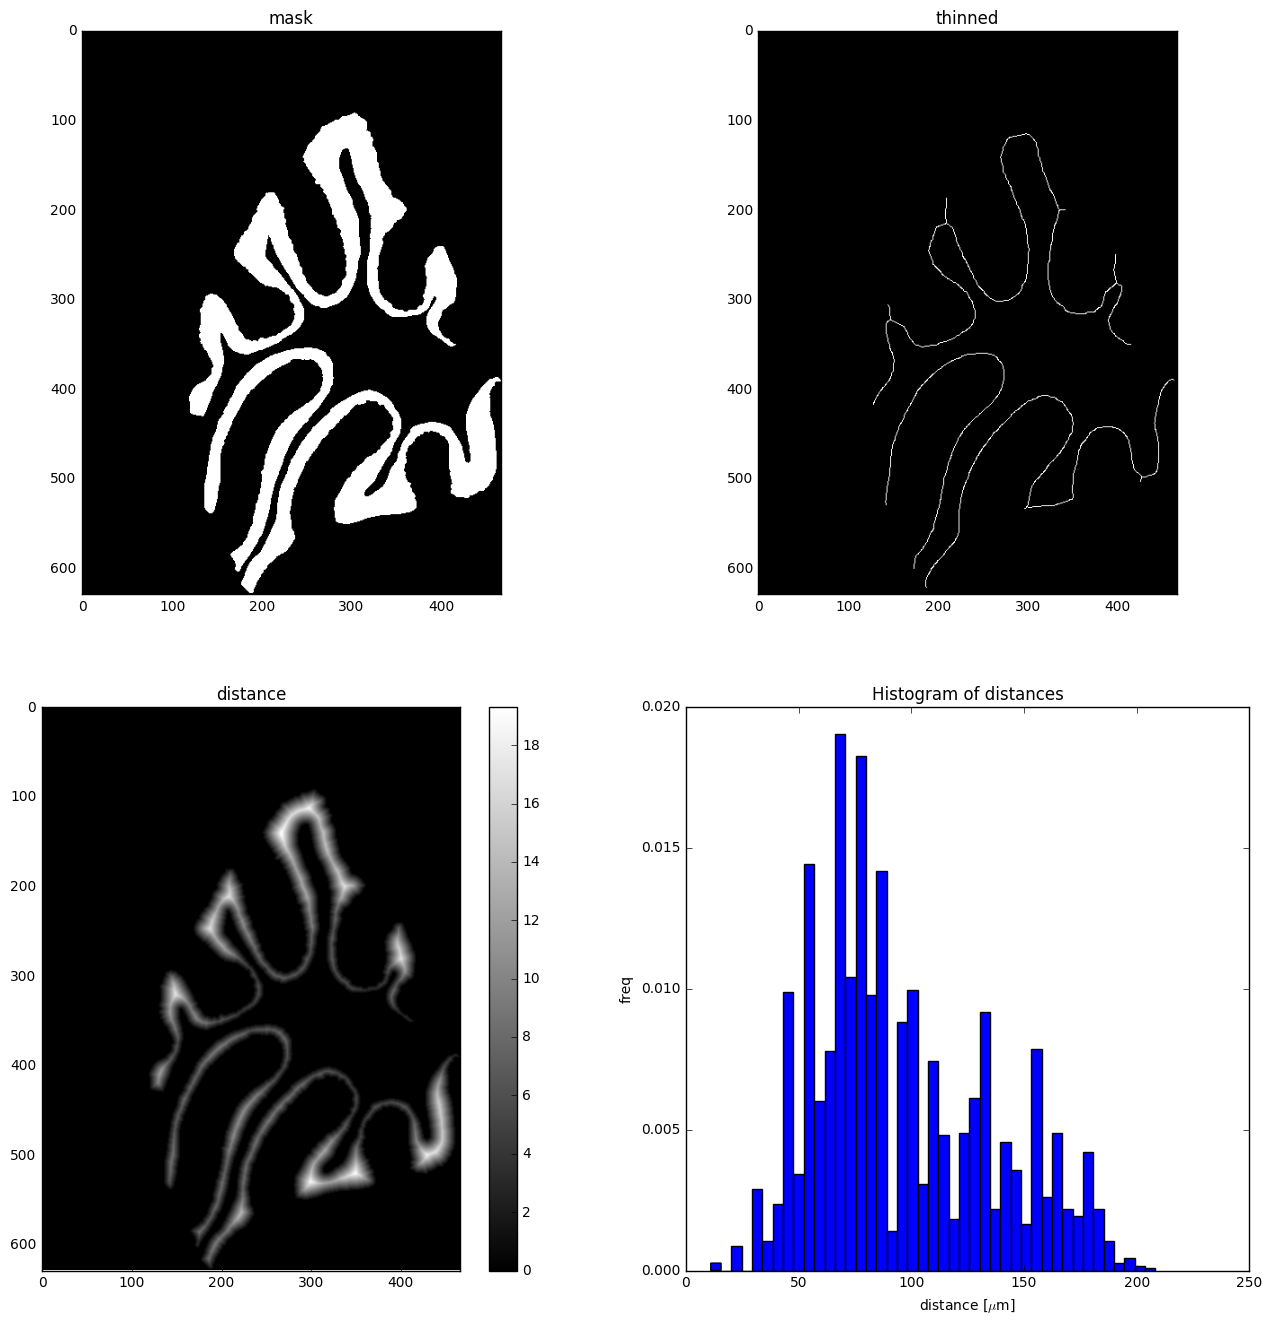

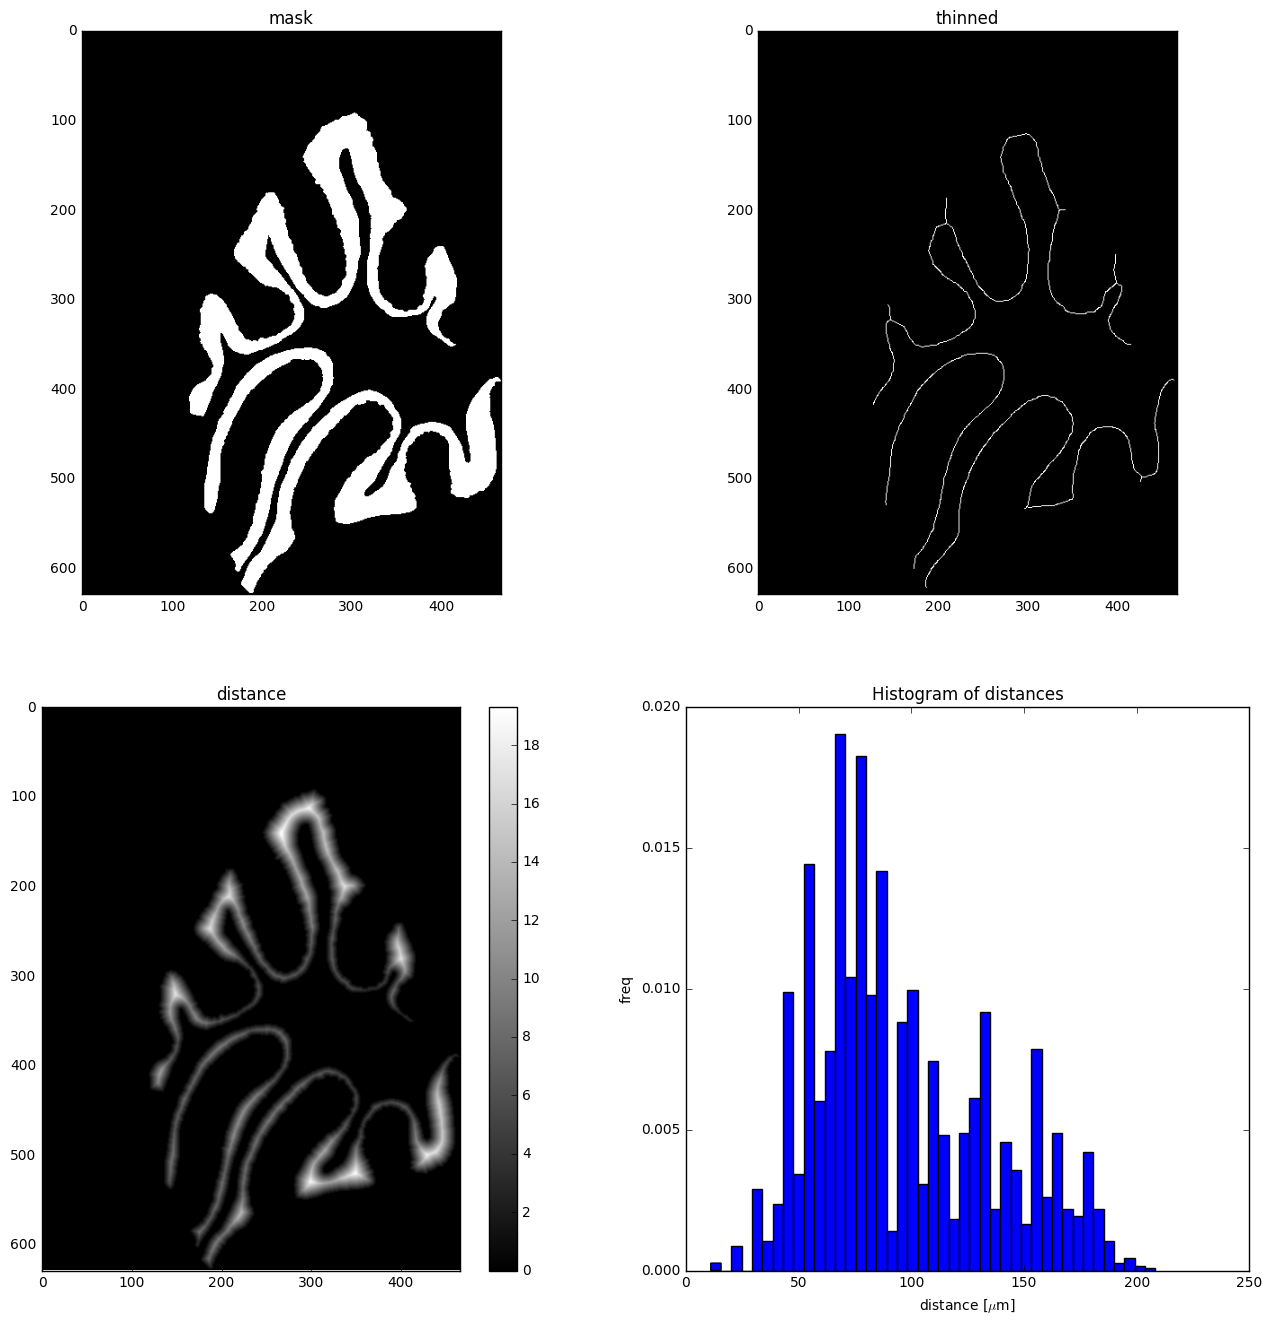

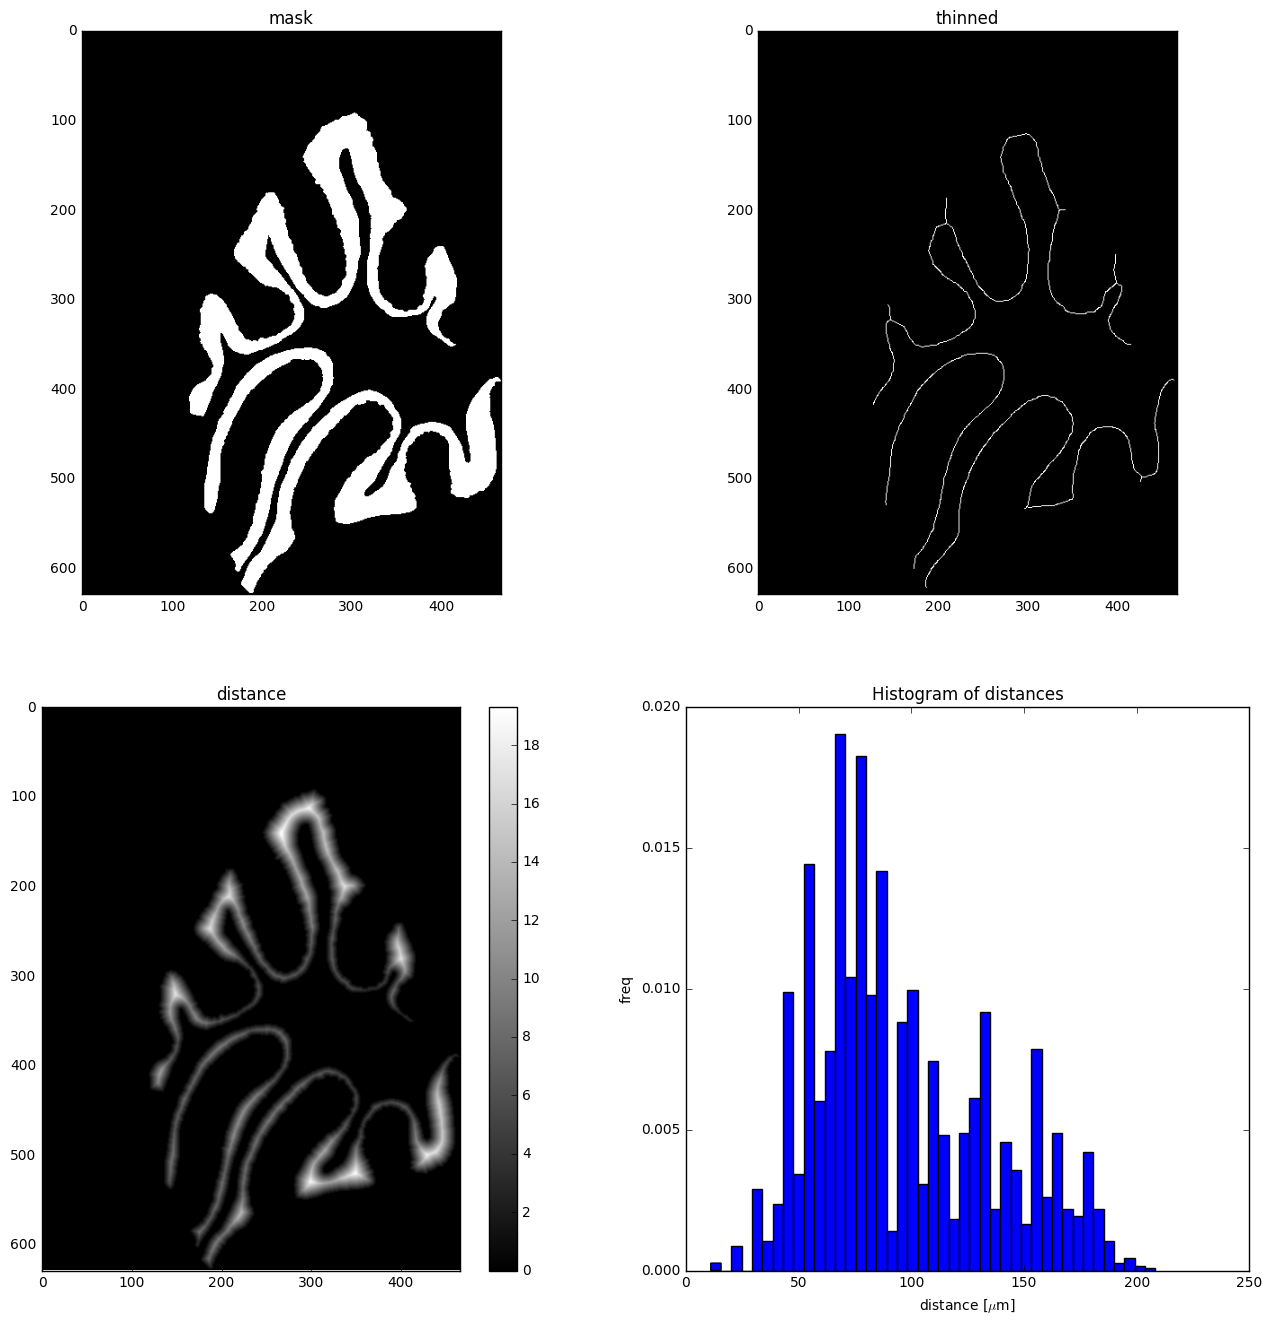

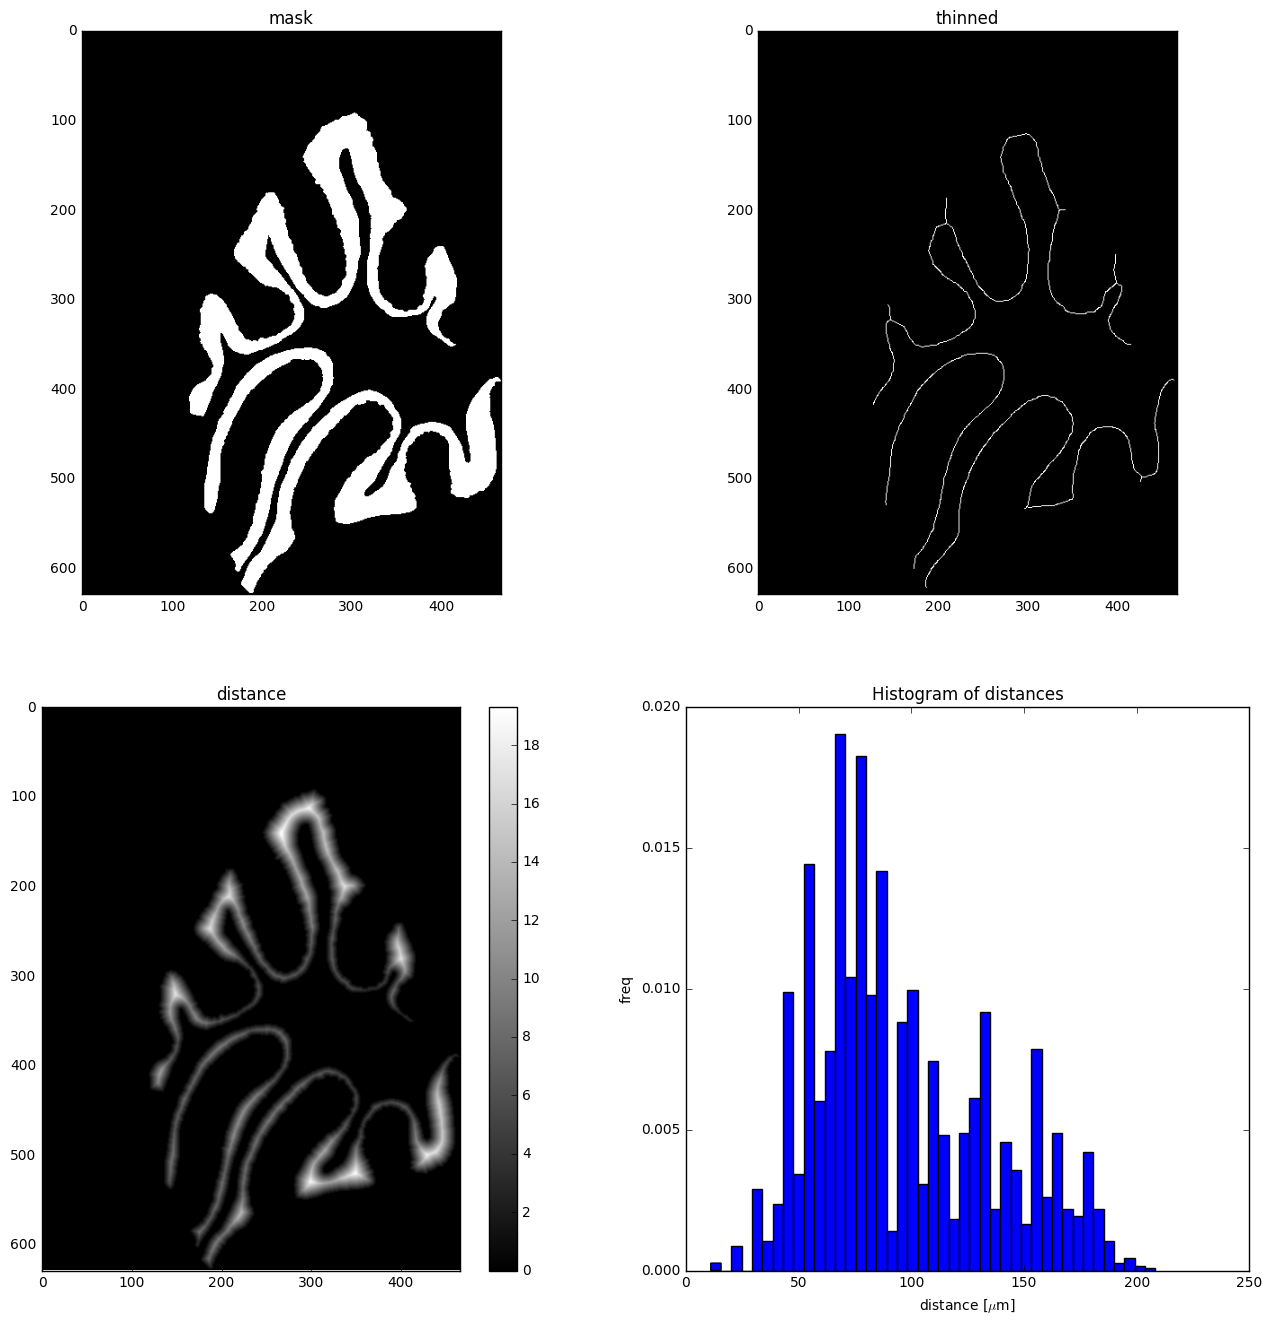

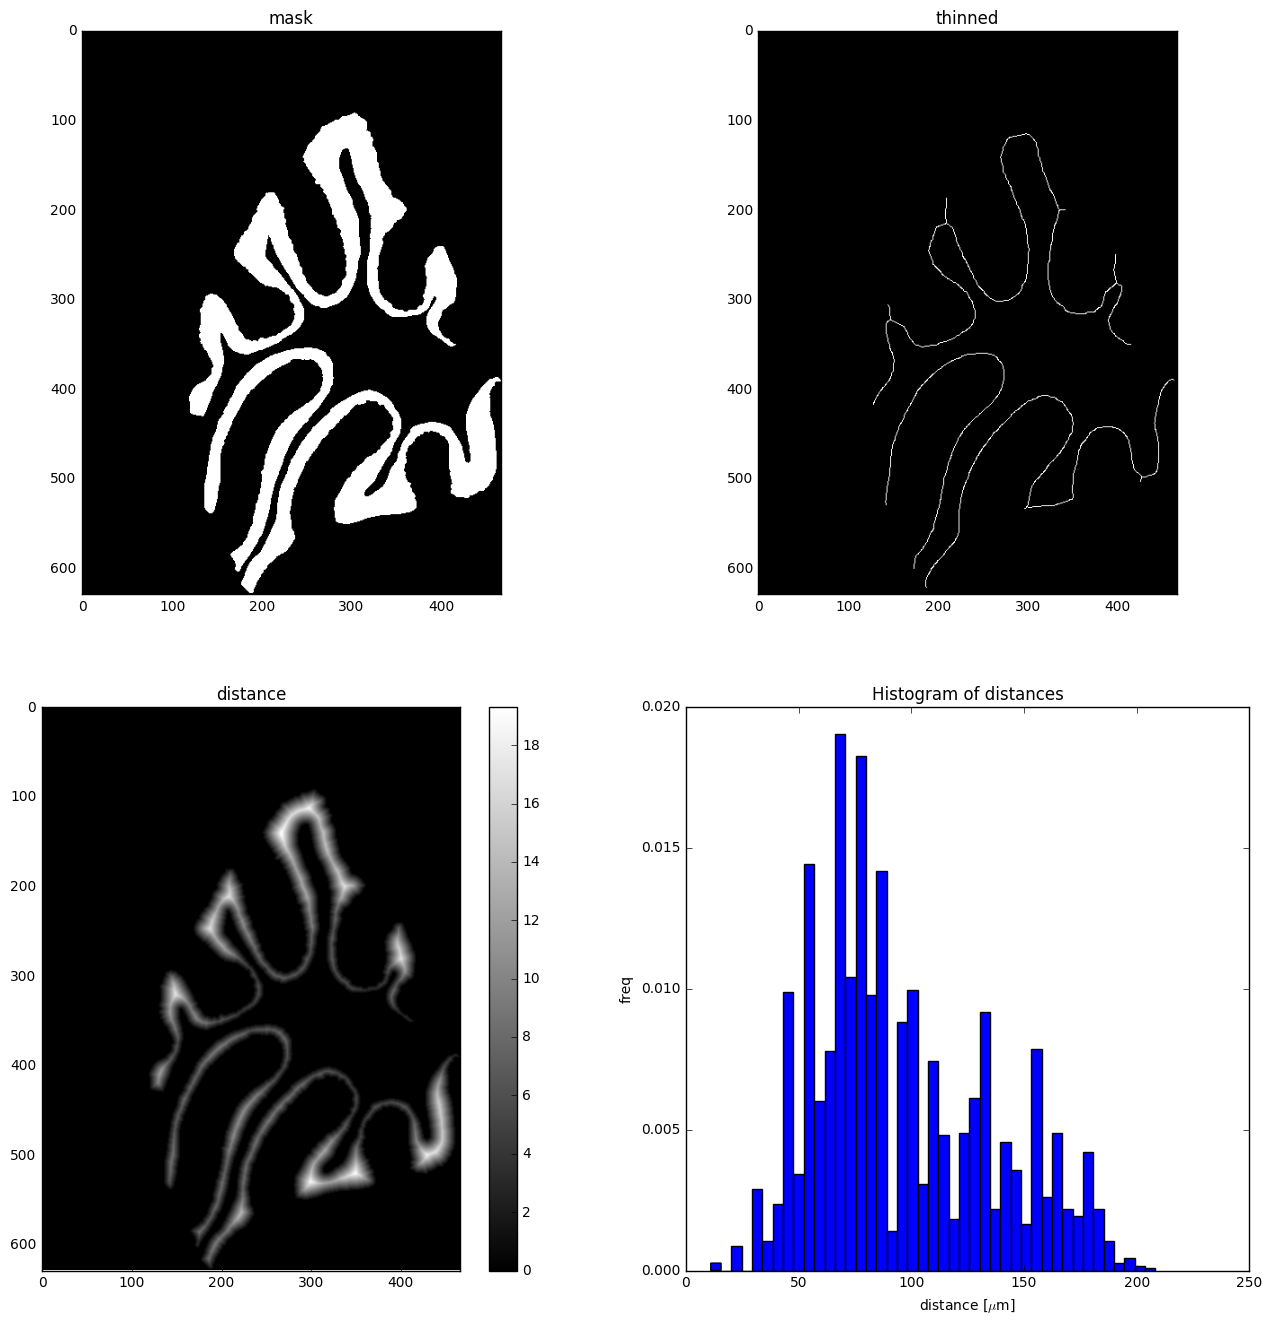

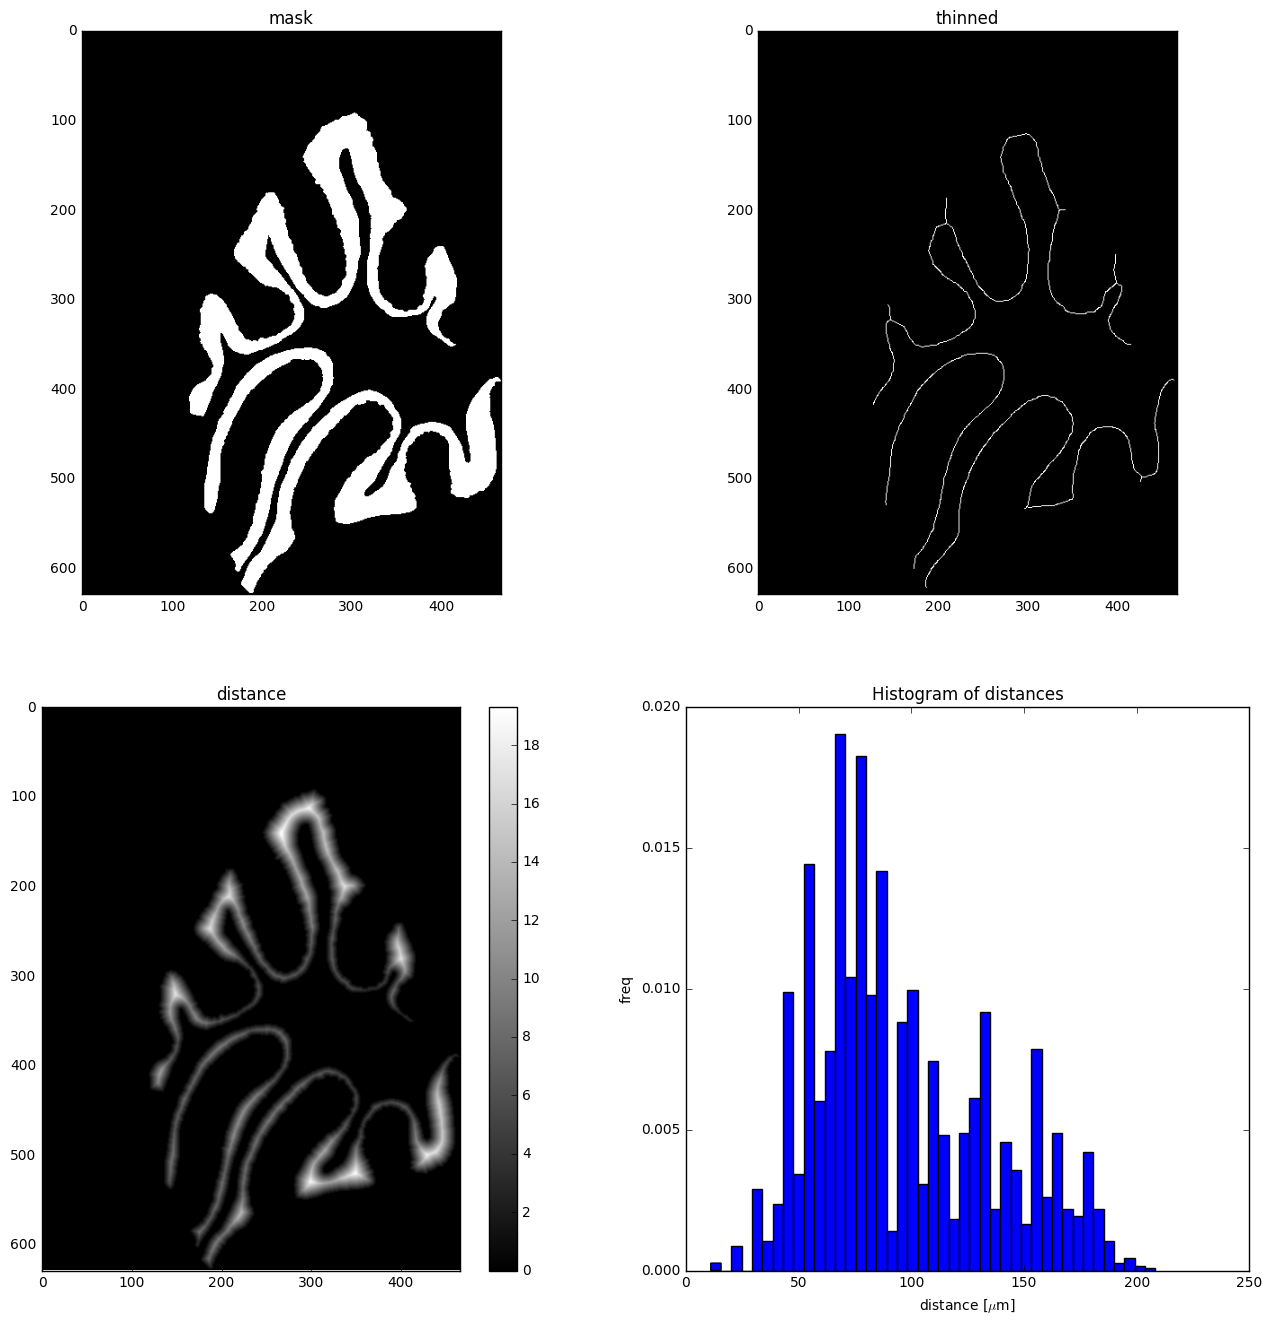

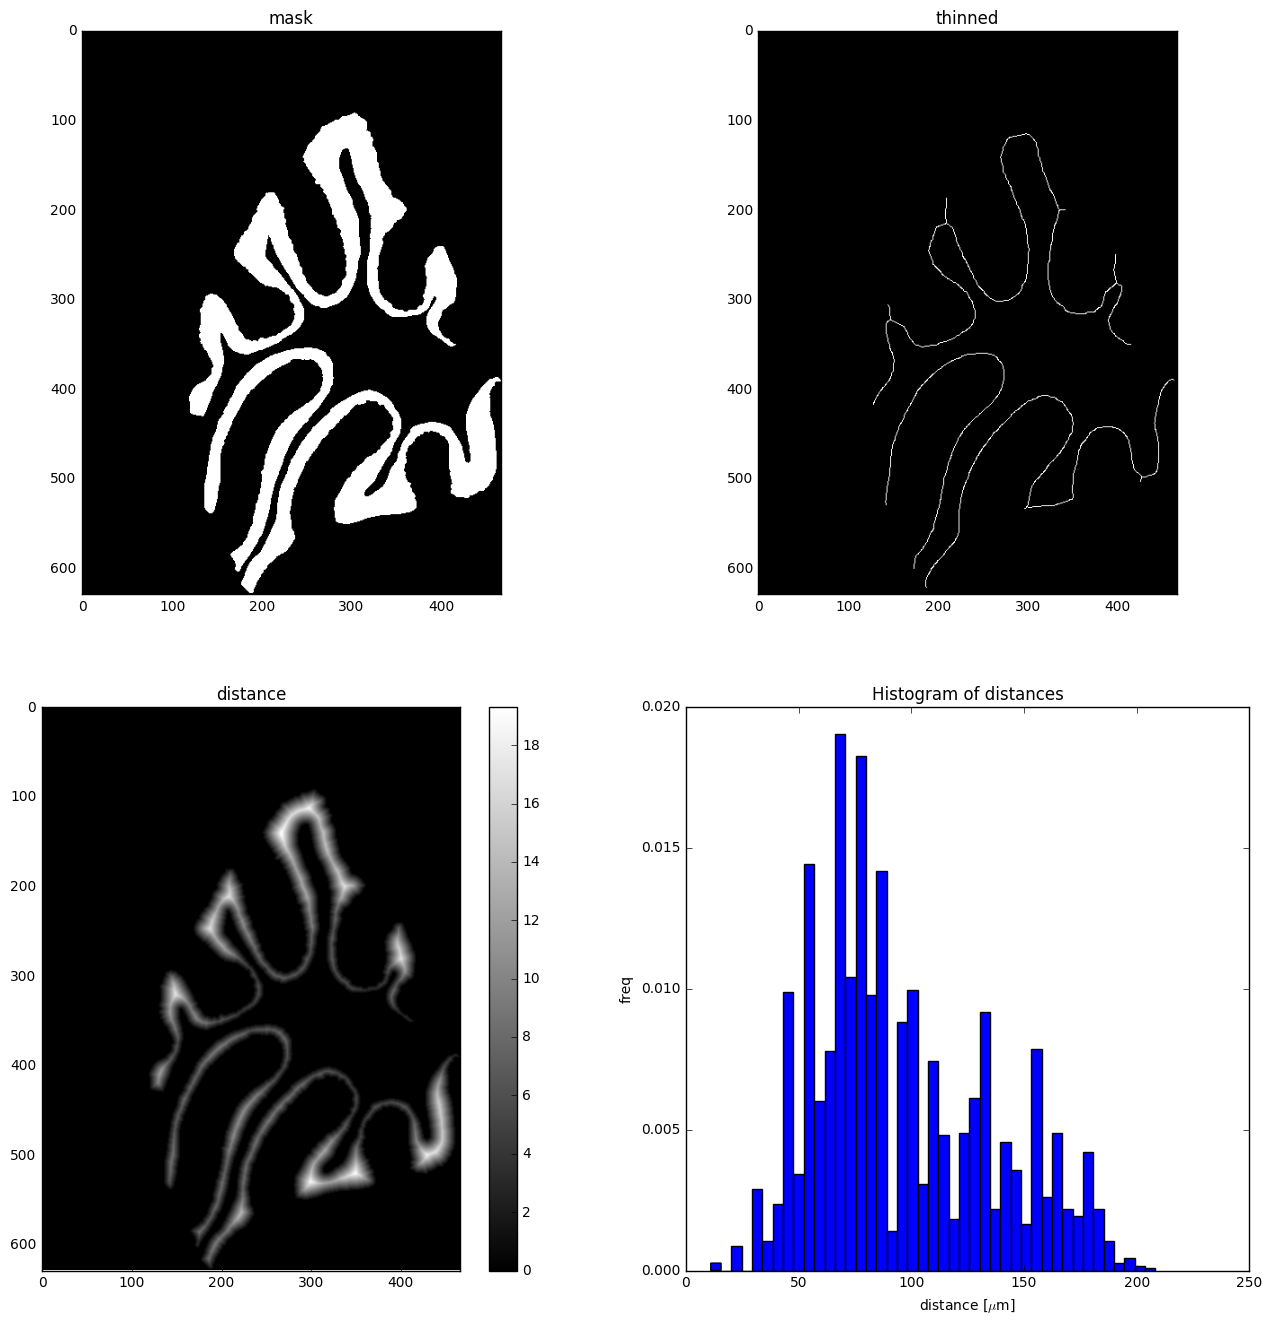

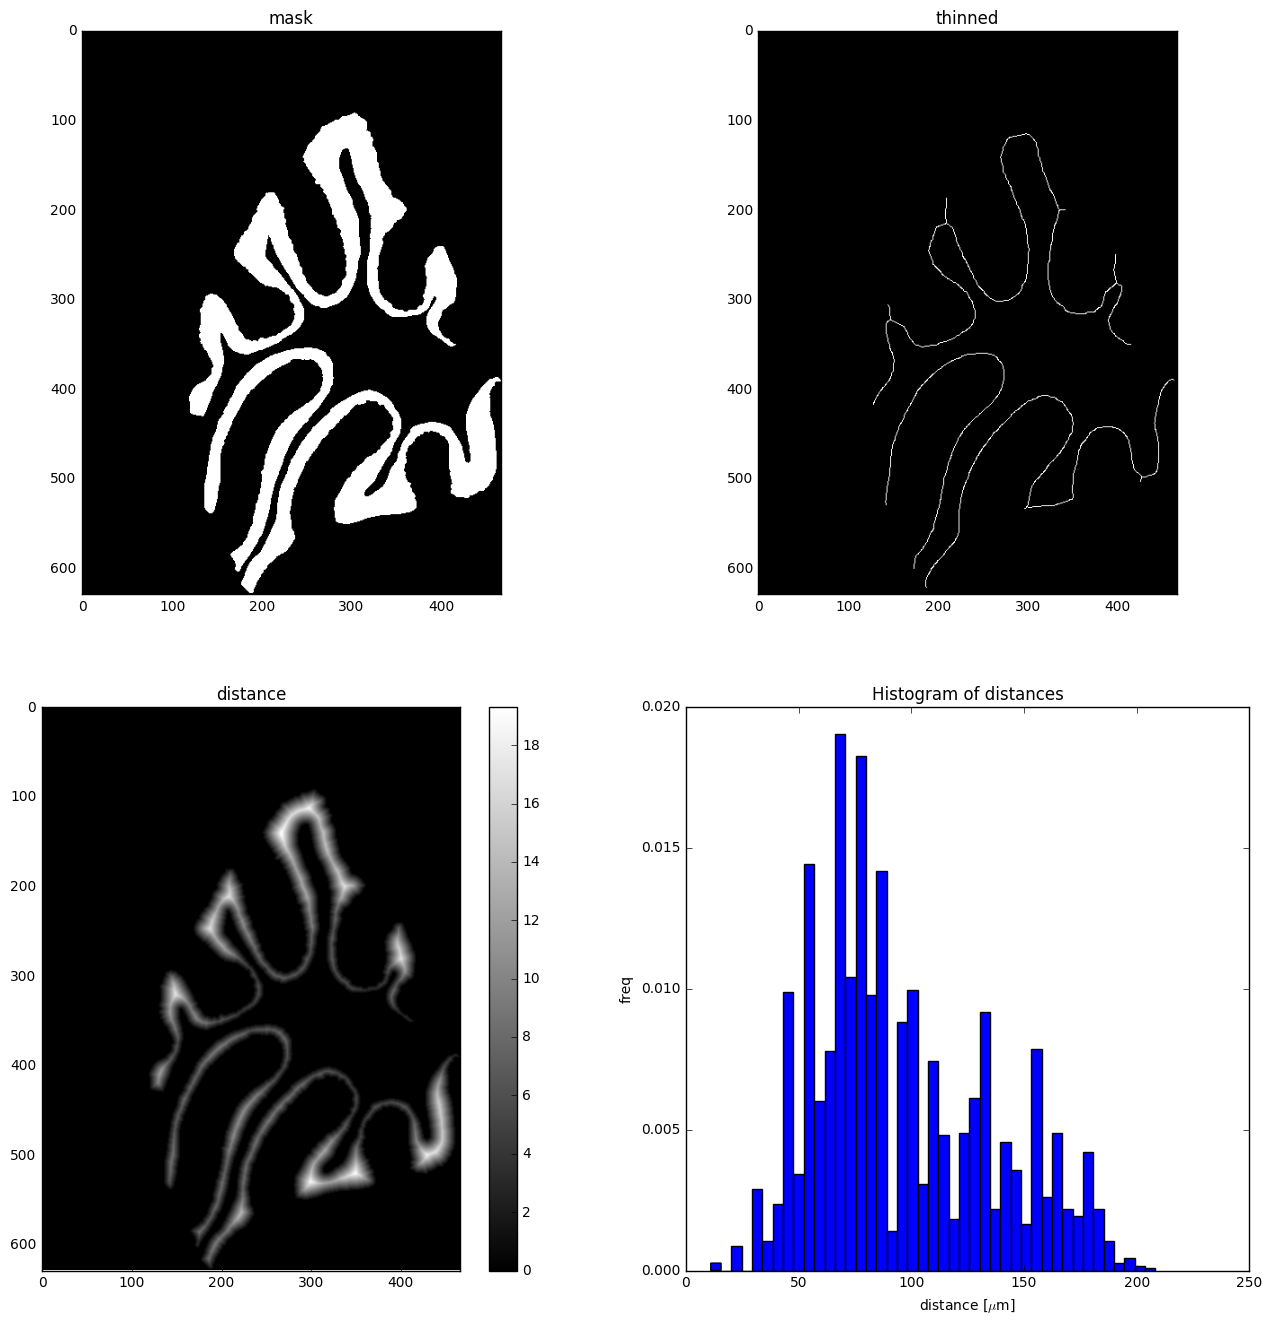

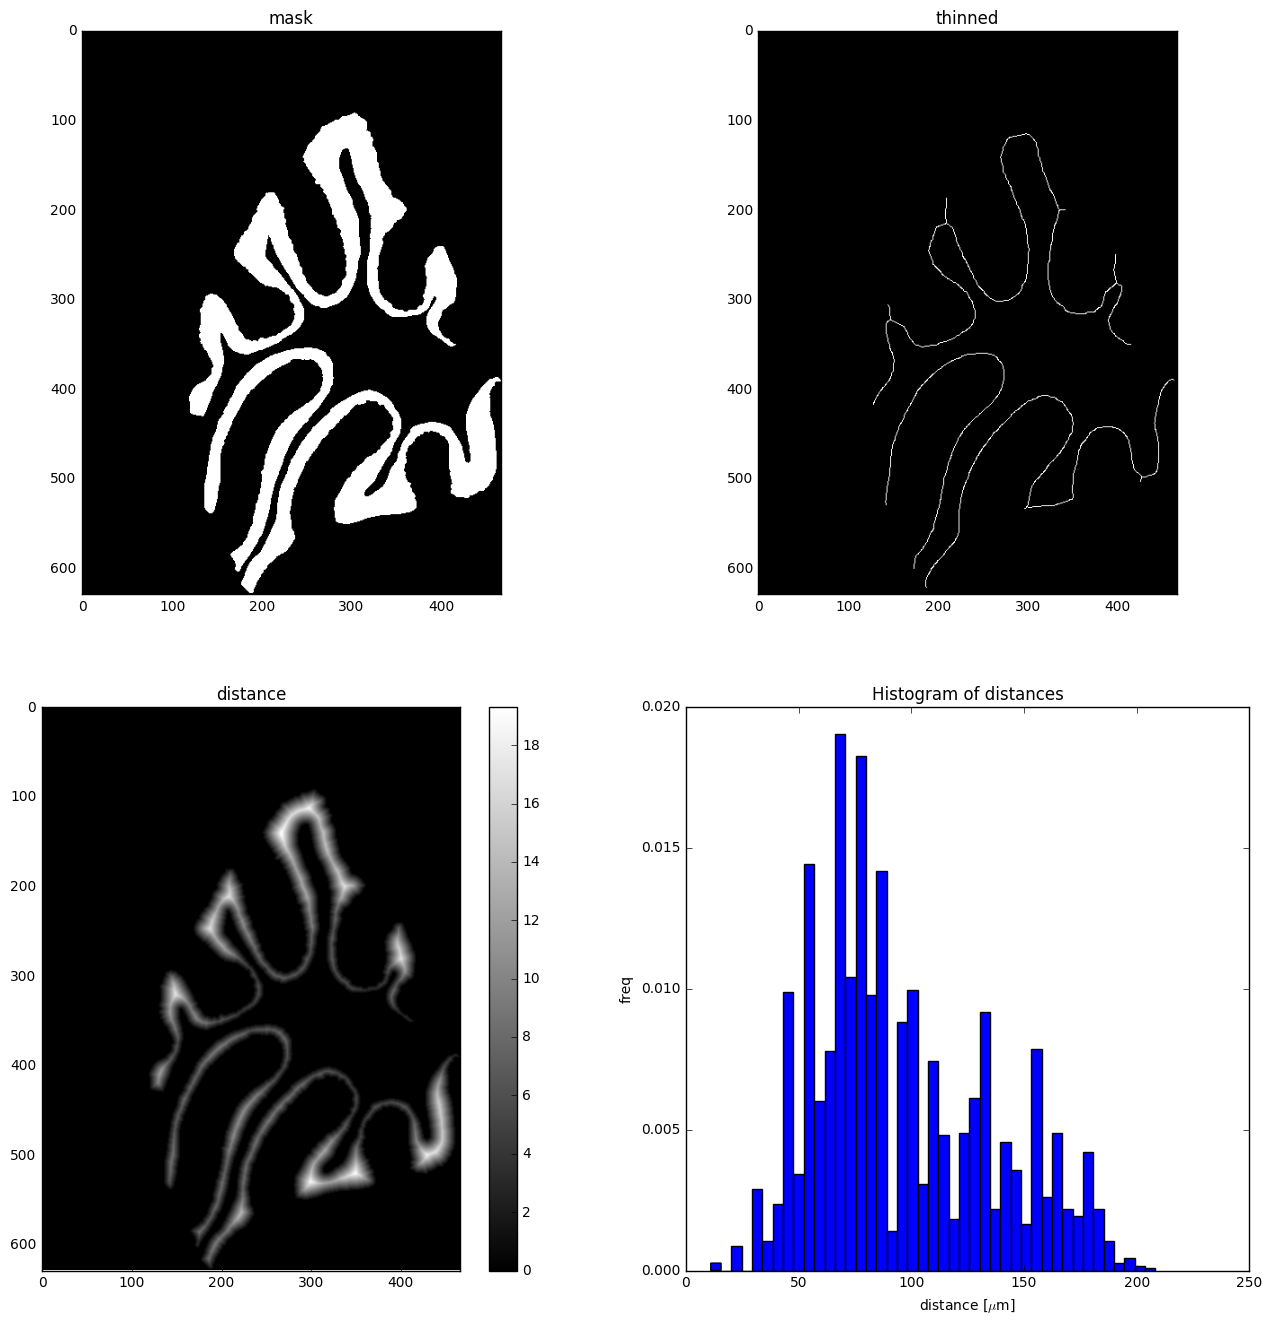

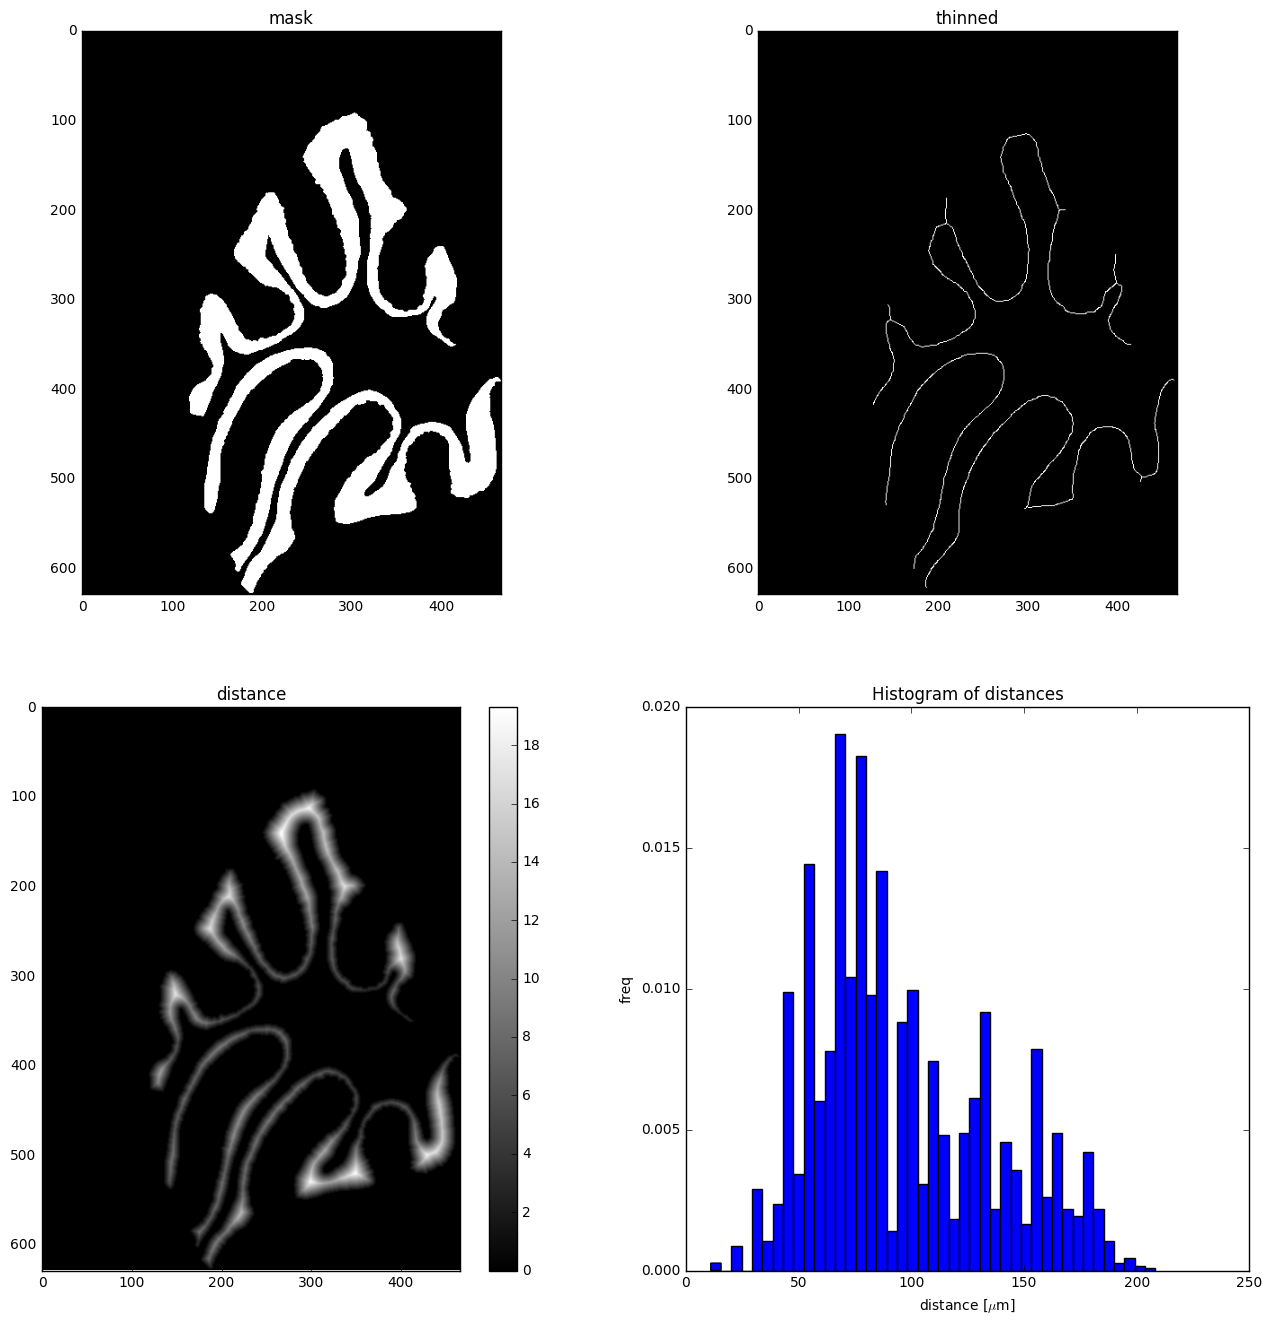

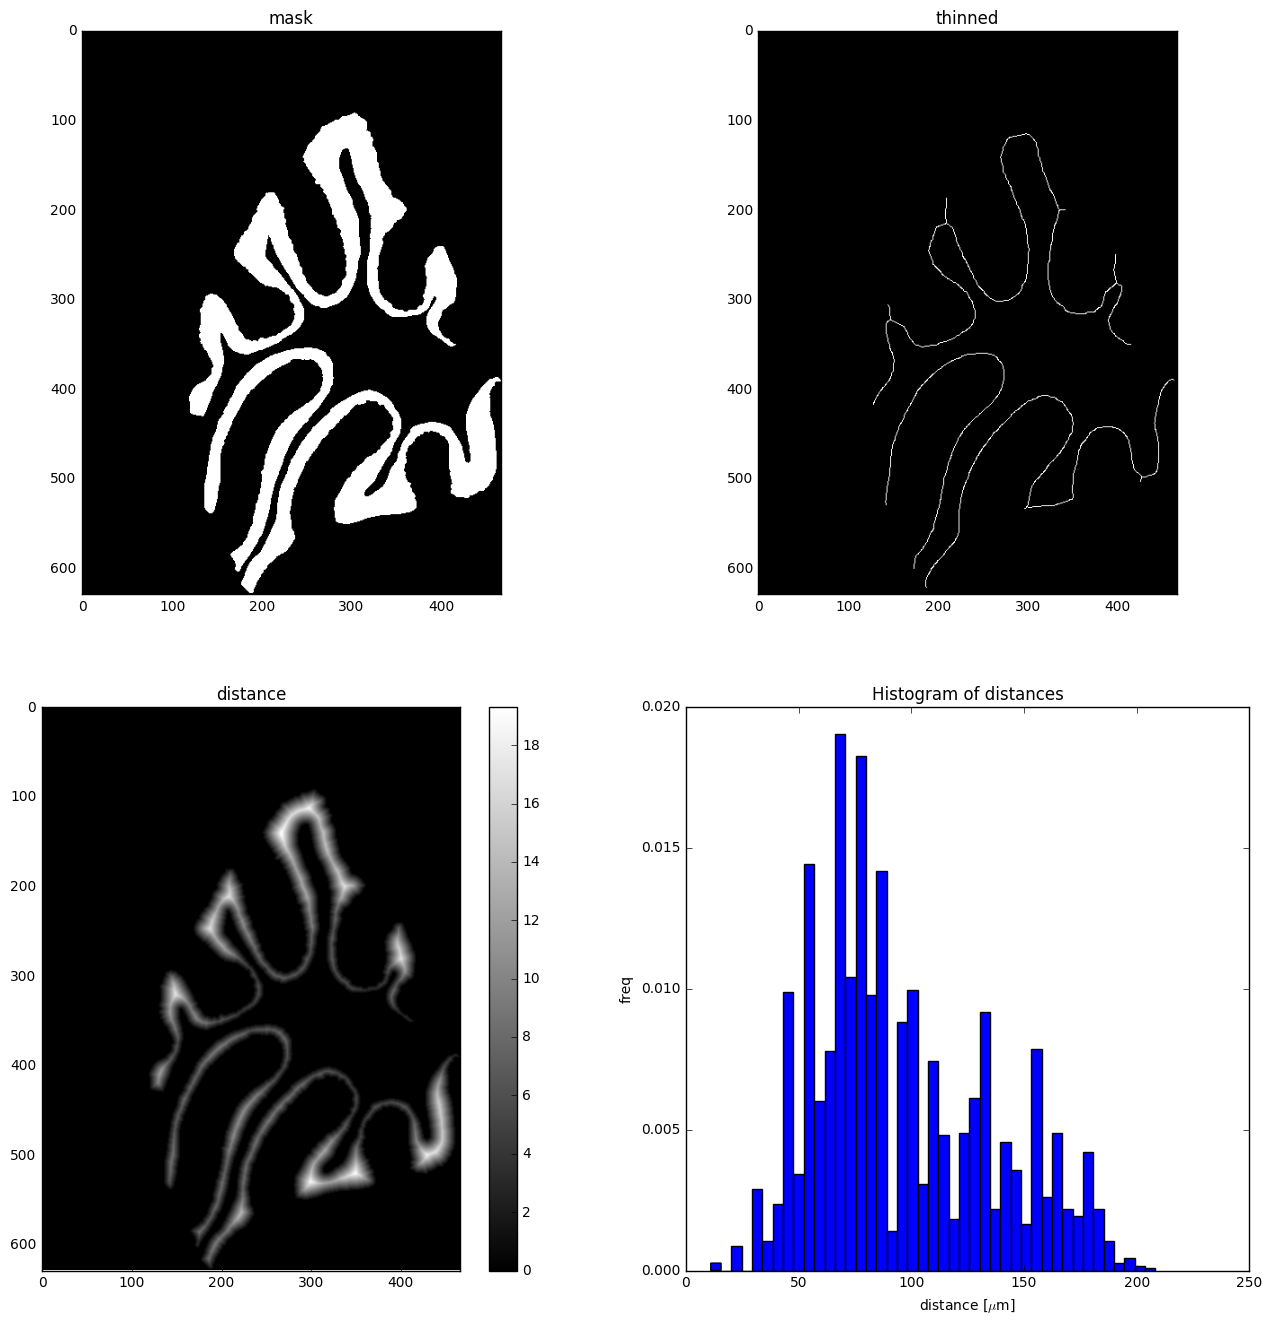

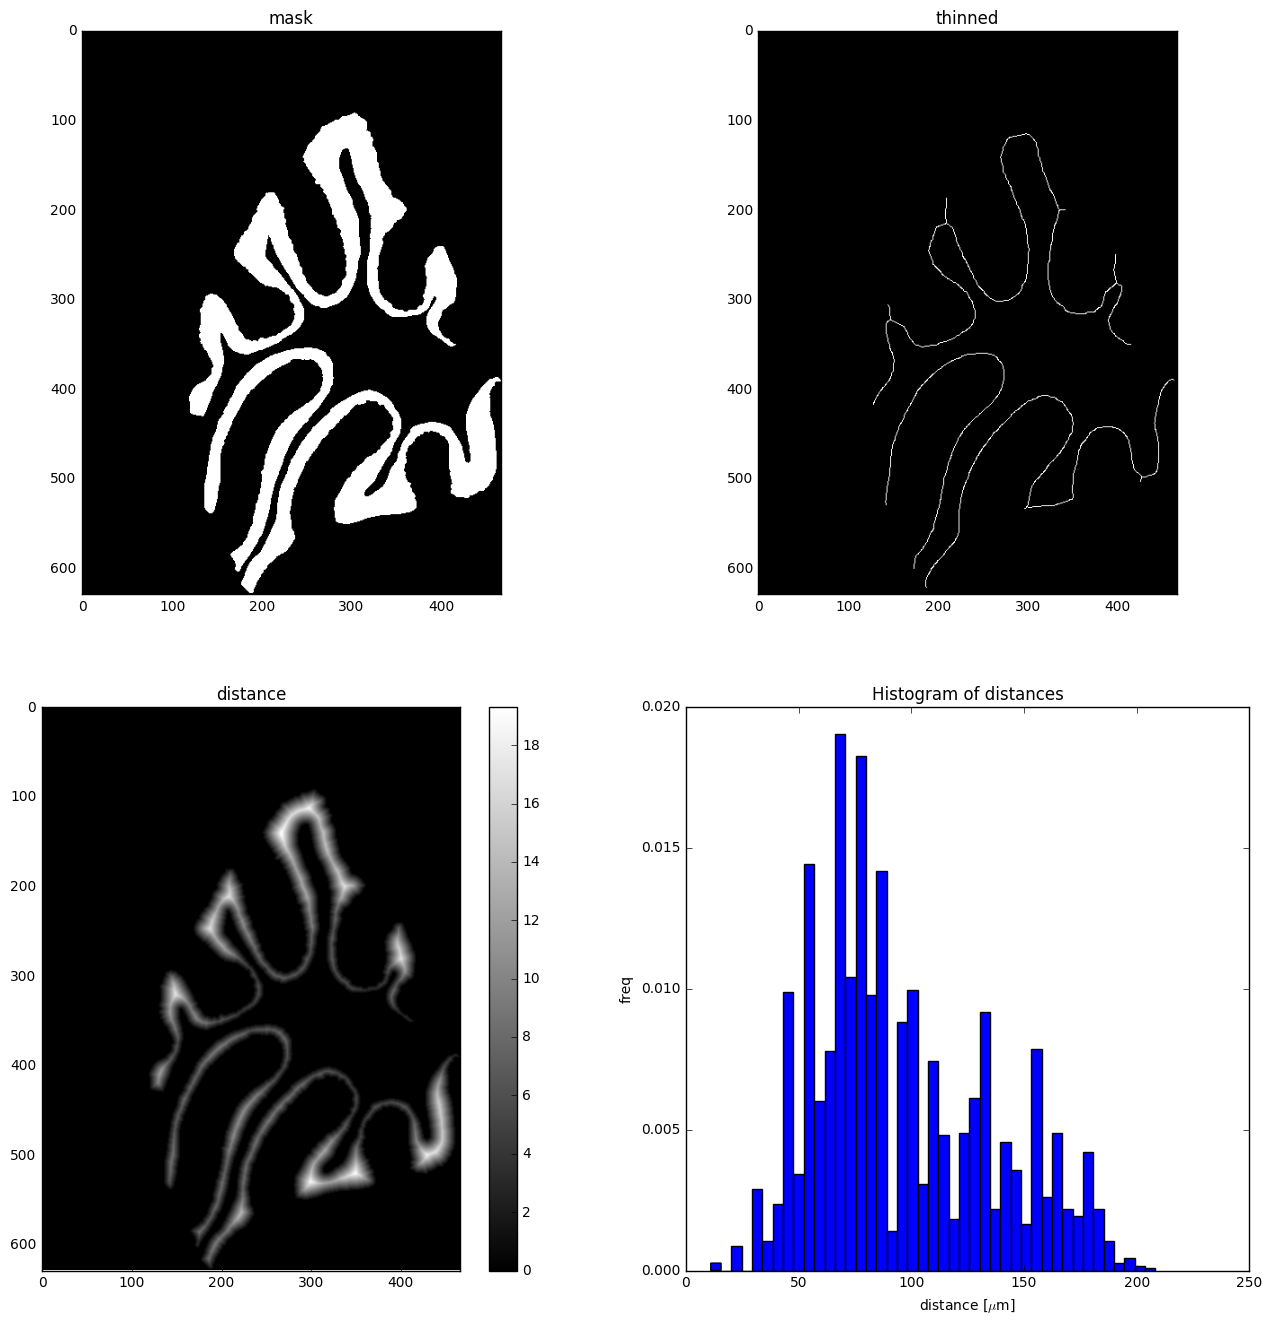

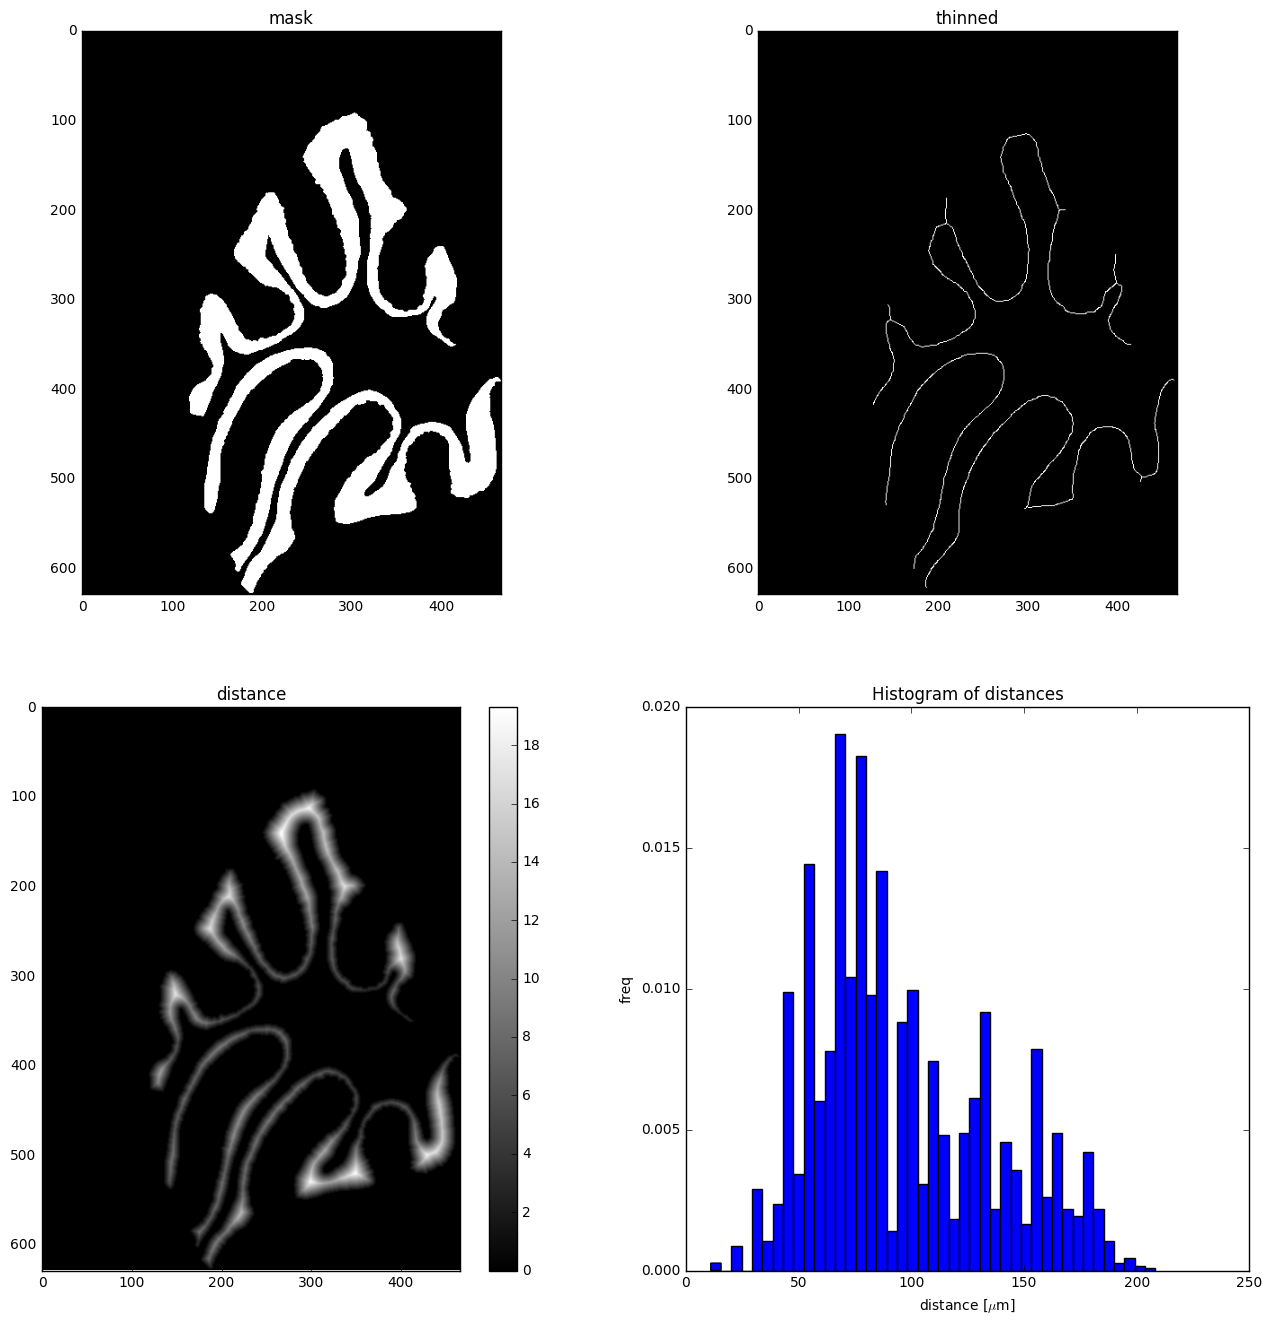

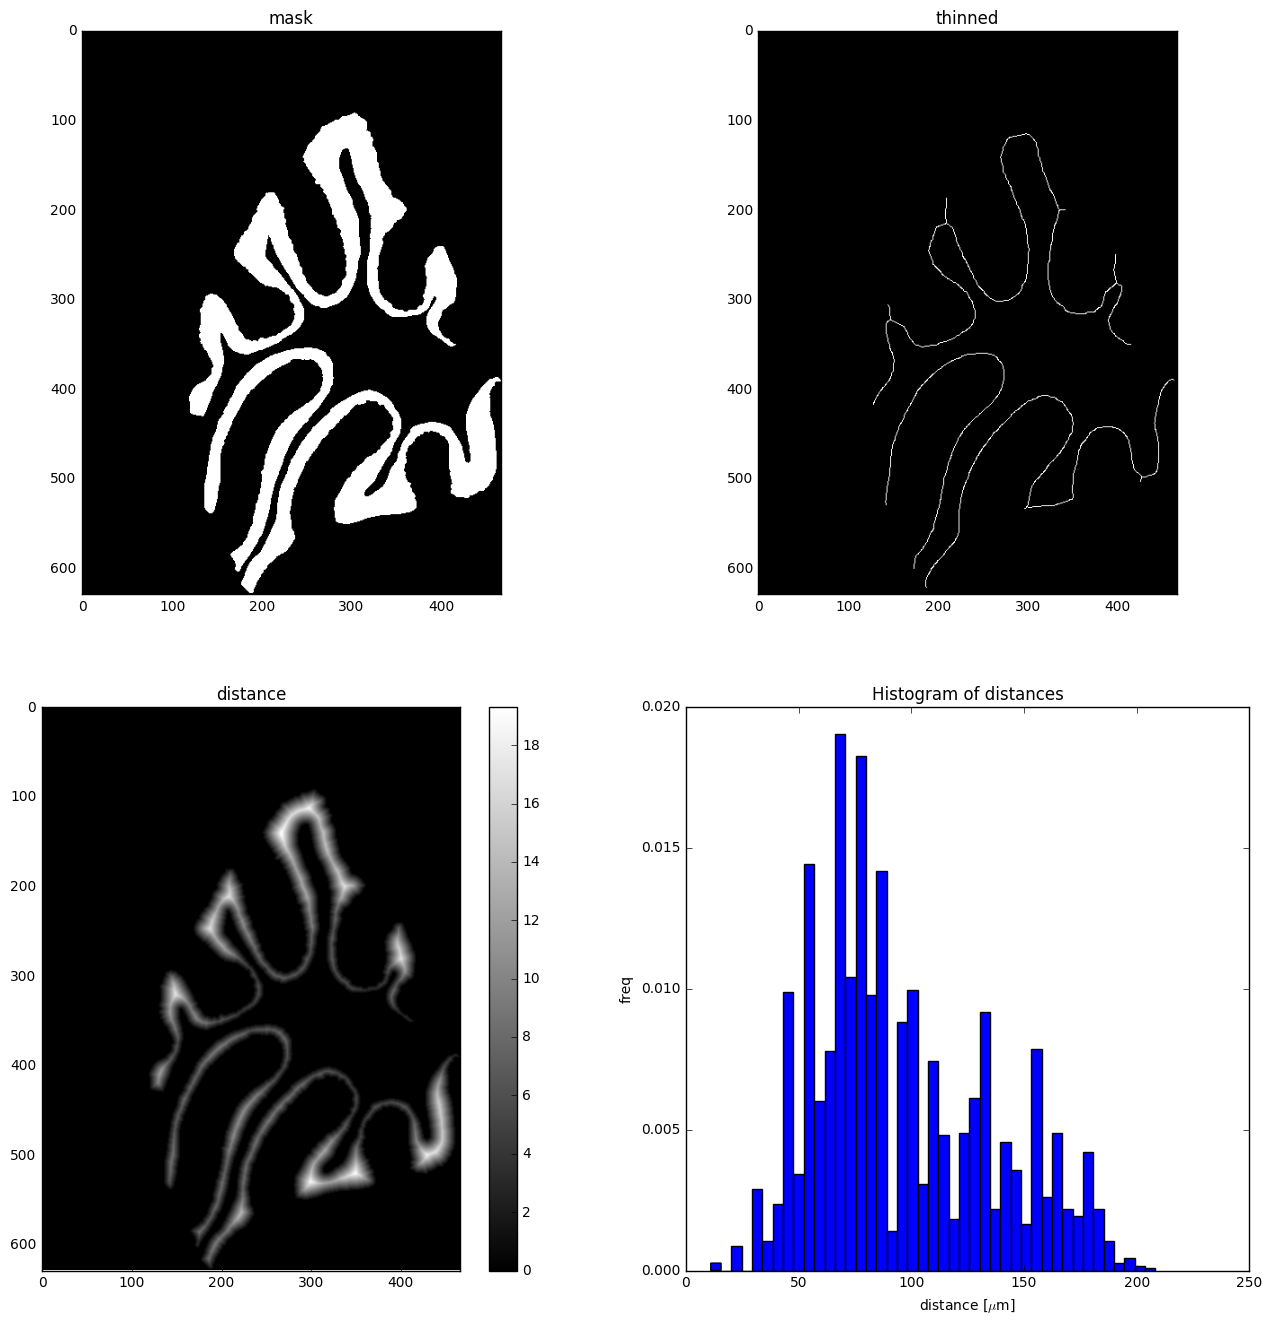

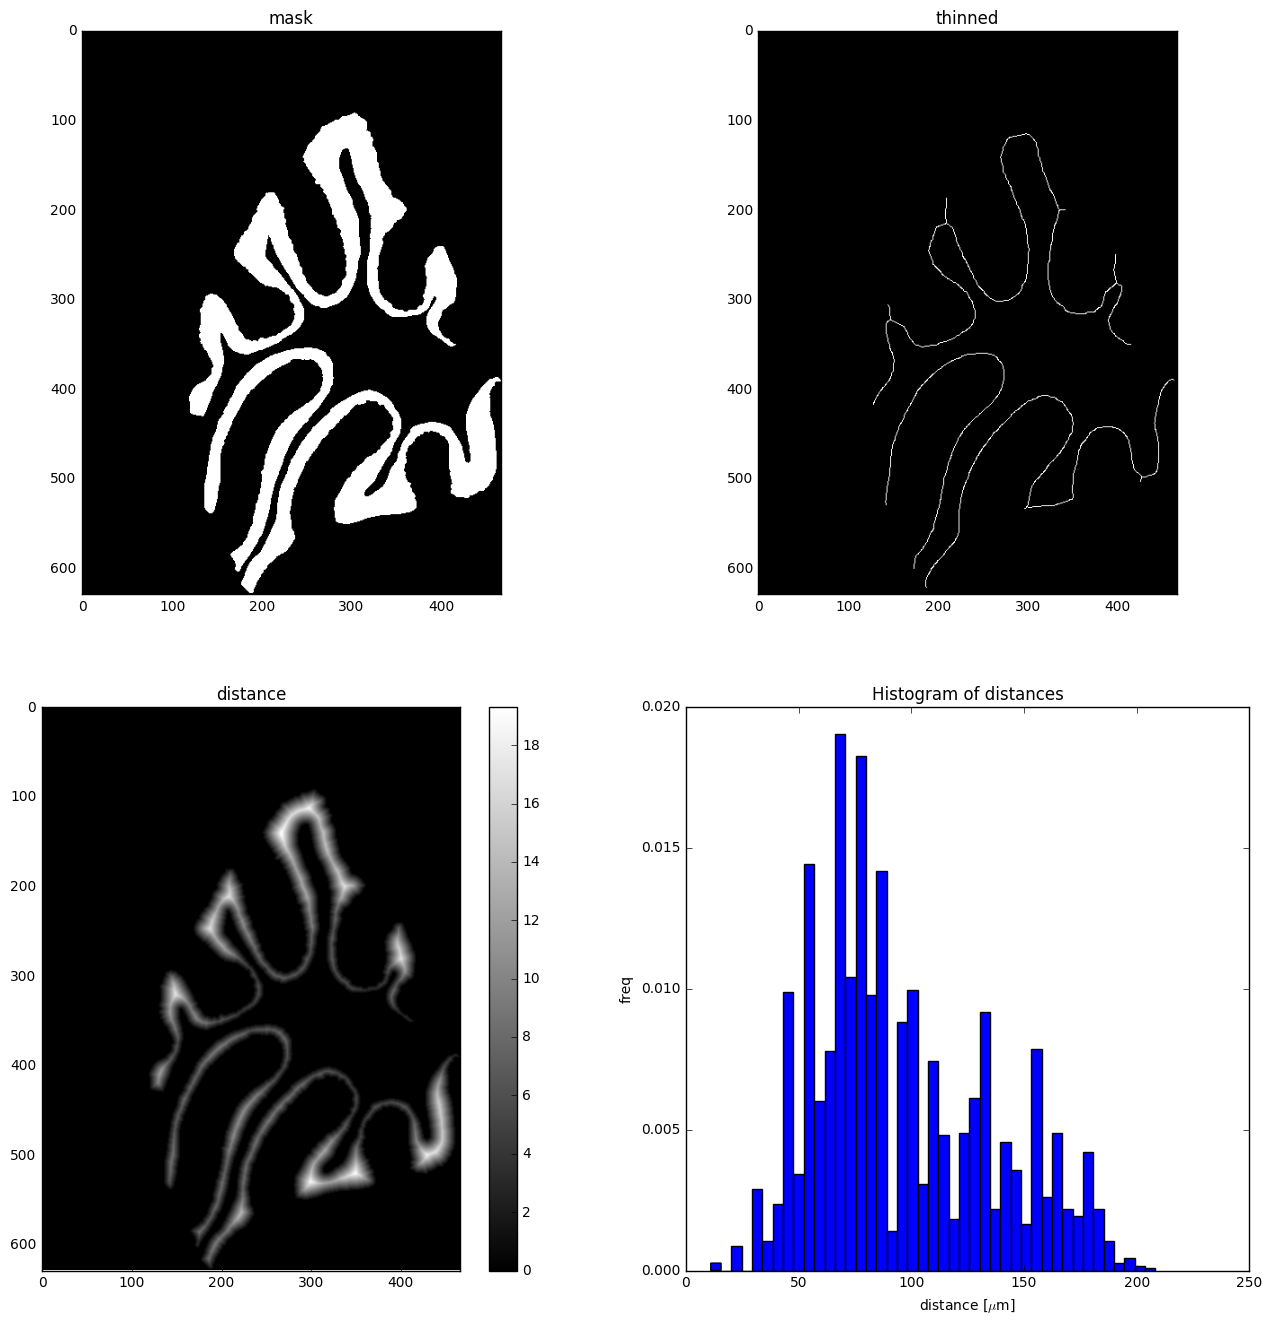

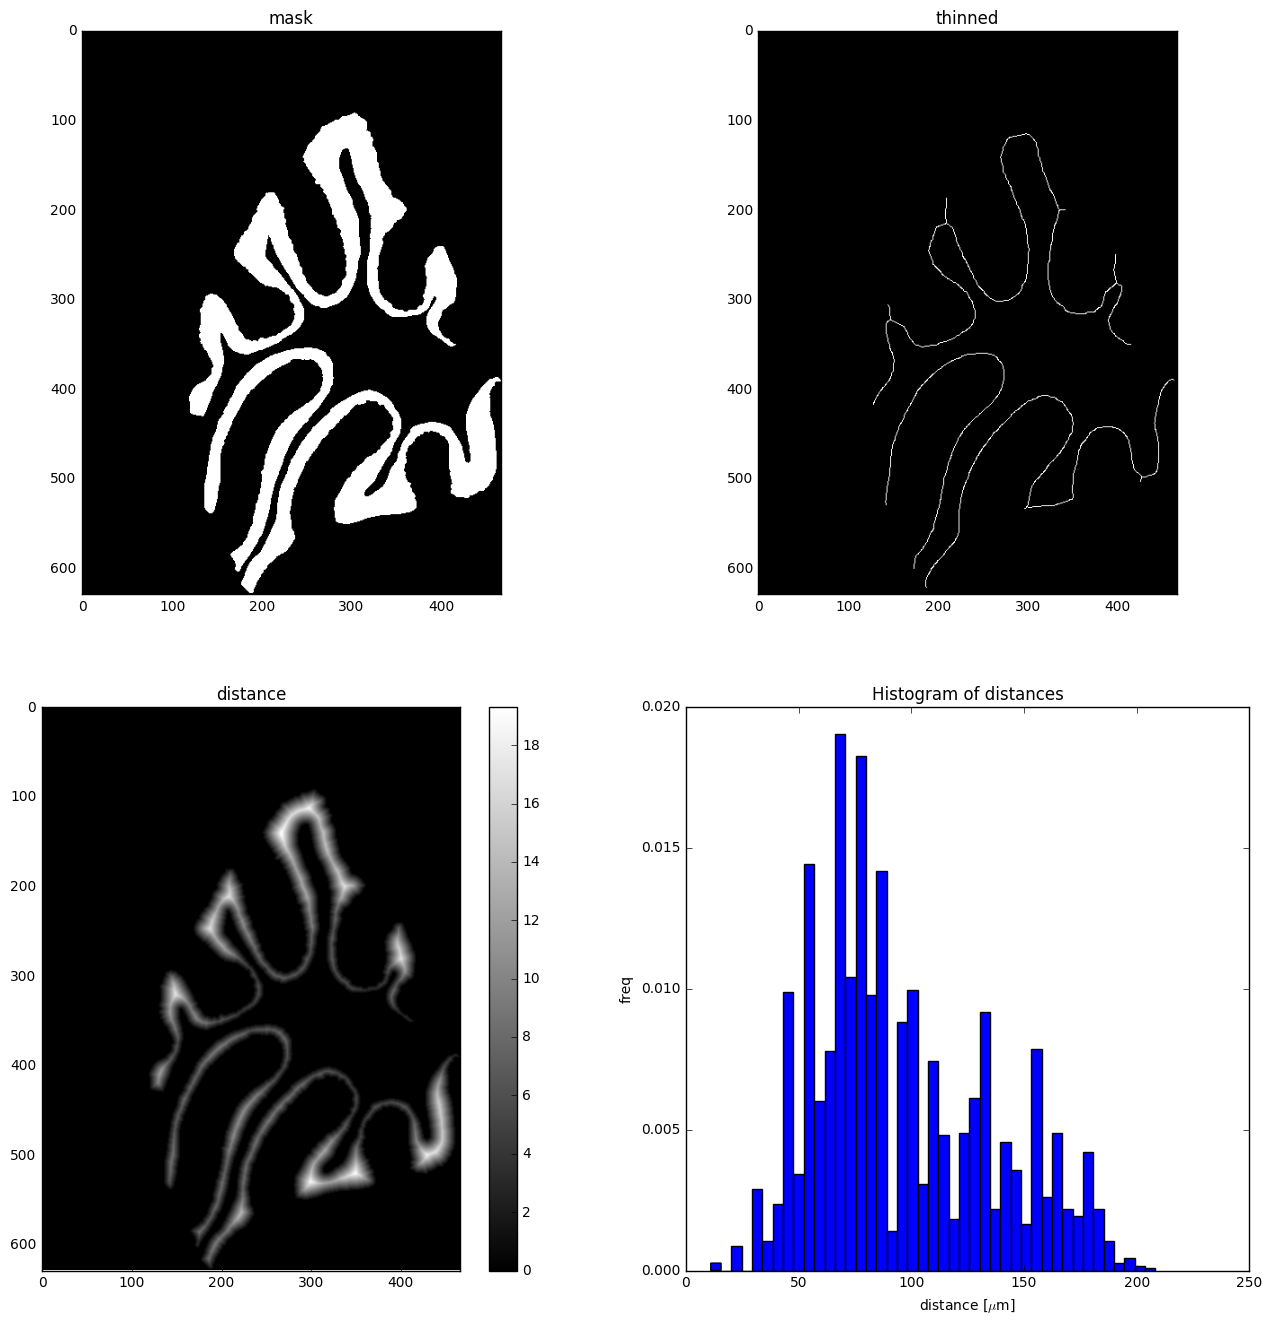

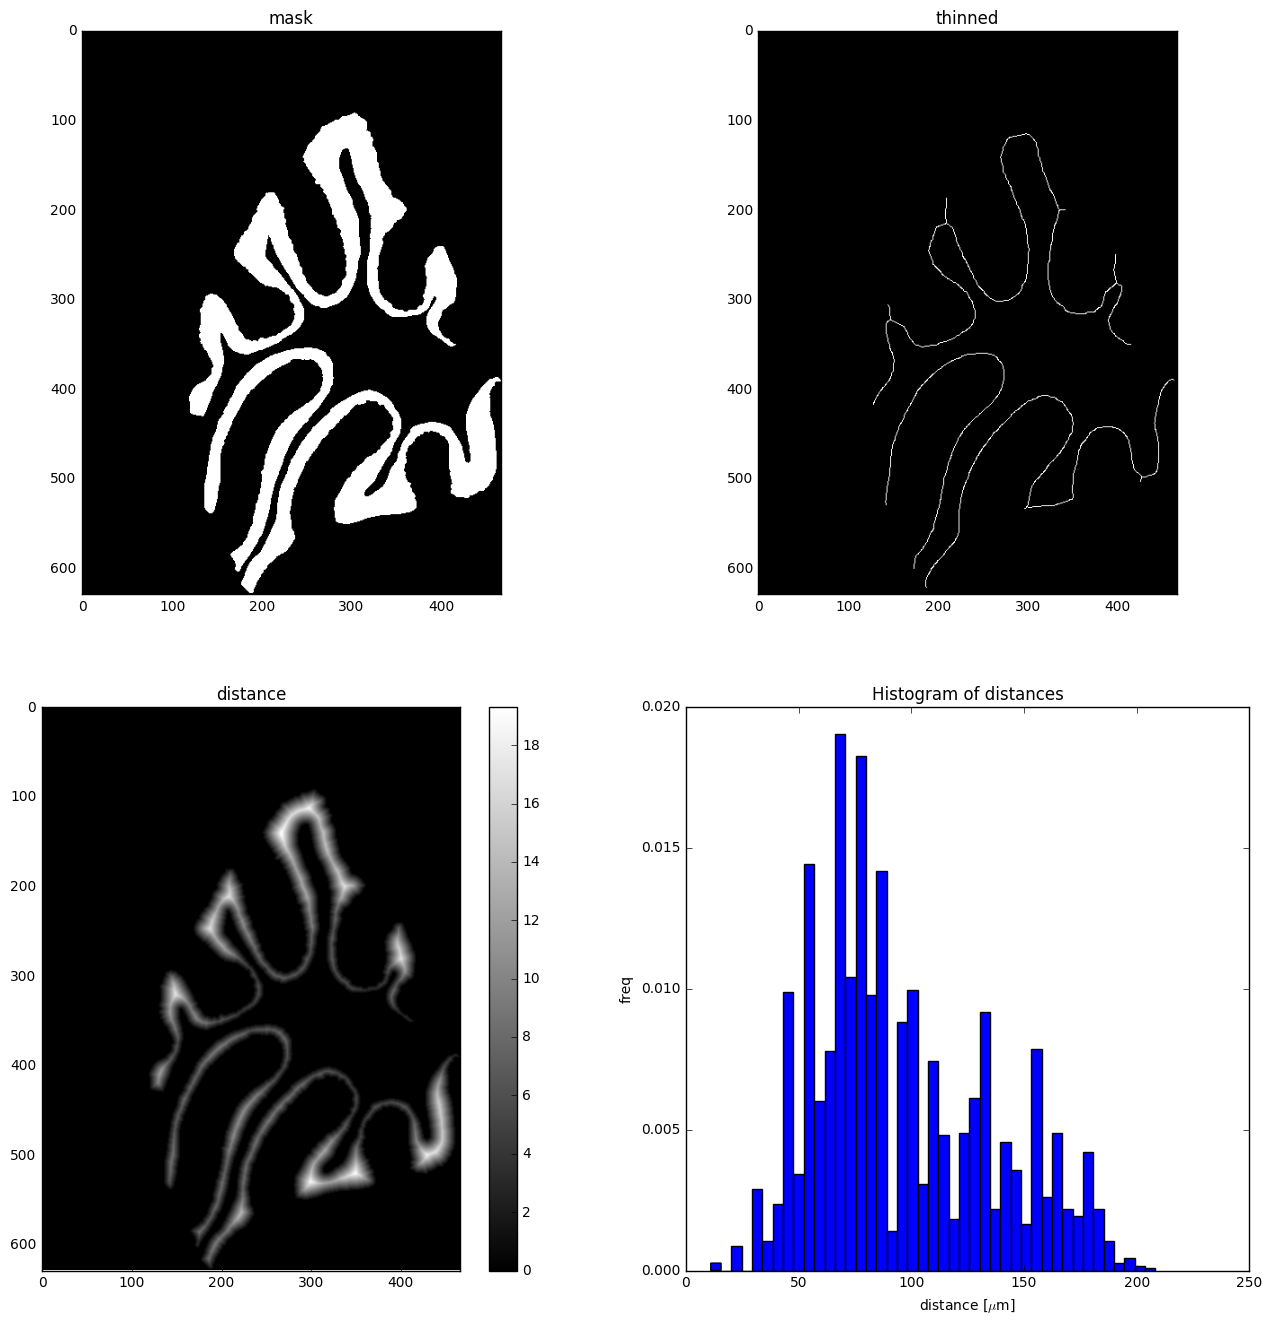

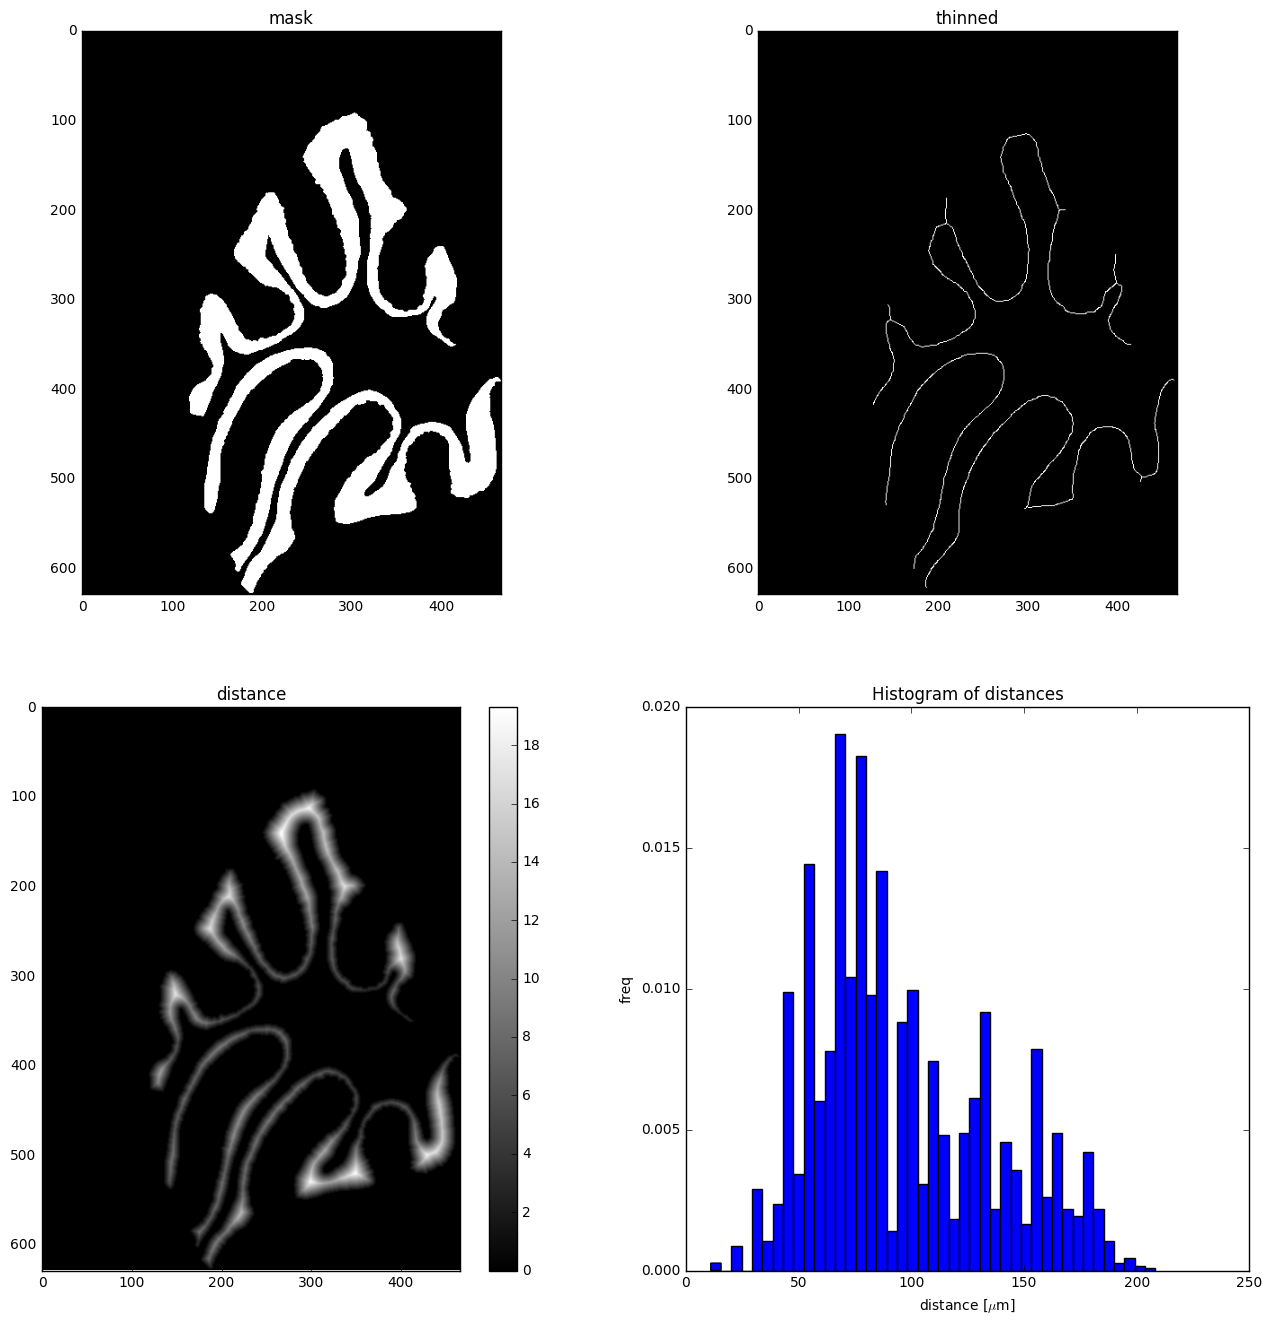

In [11]:
for mask in results:
    plt.figure(figsize=(16,16))
    plt.subplot(221)
    plt.title('mask')
    plt.imshow(mask_bw,cmap='gray')
    plt.subplot(222)
    plt.title('thinned')
    plt.imshow(bw2,cmap='gray')
    plt.subplot(223)
    plt.title('distance')
    plt.imshow(dist,cmap='gray')
    plt.colorbar()
    plt.subplot(224)
    #n, bins, patches = 
    plt.hist(th_values,bins=int(np.ceil(1.87*len(th_values-1)**0.4)),normed=1, histtype='bar')
    plt.title('Histogram of distances')
    plt.xlabel(r'distance [$\mu$m]')
    #plt.text(0.6,0.2,r'$\mu$ = {0:.2f} | $\sigma$ = {1:.2f}'.format(results[mask][0],results[mask][1]))
    plt.ylabel('freq')
    plt.savefig('./results/'+mask+'_sp.jpg');

In [8]:
masks

['./masks/GL box10-6E01mask.tif',
 './masks/GL box1-1E01mask.tif',
 './masks/GL box7-3Amask.tif',
 './masks/GL box3-4amask.tif',
 './masks/GL box6-2AE01mask.tif',
 './masks/GL box7-3E01mask.tif',
 './masks/GL box1-1mask.tif',
 './masks/GL box4-2mask.tif',
 './masks/GL box6-2mask.tif',
 './masks/GL box2-4aE01mask.tif',
 './masks/GL box2-4amask.tif',
 './masks/GL box3-4AE01mask.tif',
 './masks/GL box10-6mask.tif',
 './masks/GL box3-4E01mask.tif',
 './masks/GL box2-4mask.tif',
 './masks/GL box4-2amask.tif',
 './masks/GL box6-2Amask.tif',
 './masks/GL box7-3mask.tif',
 './masks/GL box10-6AE01mask.tif',
 './masks/GL box2-4E01mask.tif',
 './masks/GL box10-6Amask.tif',
 './masks/GL box9-5aE01mask.tif',
 './masks/GL box9-5amask.tif',
 './masks/GL box3-4mask.tif',
 './masks/GL box1-1amask.tif',
 './masks/GL box4-2E01mask.tif',
 './masks/GL box9-5mask.tif',
 './masks/GL box9-5E01mask.tif',
 './masks/GL box7-3AE01mask.tif',
 './masks/GL box6-2E01mask.tif']

In [9]:
import pprint

In [10]:
pprint.pprint(results)

{'GL box1-1E01mask': (109.02022, 43.126781, 2581),
 'GL box1-1amask': (119.45142, 47.209694, 2756),
 'GL box1-1mask': (113.61739, 43.136295, 2529),
 'GL box10-6AE01mask': (94.916832, 42.753998, 2802),
 'GL box10-6Amask': (98.786934, 40.406109, 2855),
 'GL box10-6E01mask': (97.05291, 42.260952, 2747),
 'GL box10-6mask': (97.726768, 37.819981, 2717),
 'GL box2-4E01mask': (95.158218, 43.225098, 2560),
 'GL box2-4aE01mask': (93.860176, 41.916672, 3212),
 'GL box2-4amask': (99.542595, 43.659248, 3168),
 'GL box2-4mask': (94.727844, 43.920868, 3272),
 'GL box3-4AE01mask': (102.1028, 40.983749, 2738),
 'GL box3-4E01mask': (100.98382, 40.537609, 2765),
 'GL box3-4amask': (102.59921, 42.461452, 2721),
 'GL box3-4mask': (100.39377, 42.159676, 2756),
 'GL box4-2E01mask': (109.34583, 50.195553, 3730),
 'GL box4-2amask': (106.31518, 51.163719, 3399),
 'GL box4-2mask': (105.07168, 49.744205, 3849),
 'GL box6-2AE01mask': (100.7189, 41.112309, 2498),
 'GL box6-2Amask': (97.937653, 40.743851, 2517),
 '